# Credit Card Fraud Detection
<img src='https://cdn.casinoalpha.com/uk/media/2022/09/Debit-and-credit-card-fraud-%E2%80%93-what-to-do-if-it-happens-to-you-1024x576.jpg' width=800>

## Dataset Description:
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
Given the **class imbalance** ratio, we recommend measuring the accuracy using the Area Under the **Precision-Recall Curve (AUPRC)**. Confusion matrix accuracy is not meaningful for unbalanced classification.
#### Dataset is in **Kaggle** and the link for the dataset is: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, AllKNN, NeighbourhoodCleaningRule
from sklearn import metrics
from sklearn.ensemble import HistGradientBoostingClassifier
from summarytools import dfSummary
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Read Credit Card Fraud Detection Dataset

In [2]:
credit_df = pd.read_csv('creditcard.csv')
credit_df.sample(10)

Time        V1        V2        V3        V4        V5        V6  \
197256  131923.0 -1.051498 -0.056257  3.430844  4.545215  0.434747  3.880760   
262042  160287.0  2.076070 -1.202559 -0.213317 -0.653161 -1.165570  0.380240   
204938  135511.0 -0.396875  0.302161 -1.021965 -0.476986  2.081404 -0.811101   
283052  171338.0 -0.822304  0.743100  1.071102 -0.242842 -0.171761 -0.339192   
6165      7156.0  0.362660  2.100119 -2.069281  1.669551  1.234203 -1.599324   
49414    44049.0 -1.477438  0.242426  2.048539  1.744899 -0.564159  0.916860   
234946  148182.0 -1.371364  1.840654 -3.218048 -2.258071  2.837202  2.598663   
10108    15371.0  1.316289  0.244388  0.276008  0.641606 -0.107880 -0.493897   
45176    42237.0 -1.234546  0.473550  3.002522  1.951529 -0.586545  0.832948   
157907  110602.0 -1.193567  1.665207 -2.165598 -1.222948  2.645636  3.335239   

              V7        V8        V9  ...       V21       V22       V23  \
197256 -1.256940  1.171422 -0.159179  ...  0.151457  0.995840 -0.200703   
262042 -1.504255  0.182096  0.379891  ... -0.158948 -0.022388  0.263339   
204938  1.043505 -0.121031 -0.441177  ...  0.315049  0.941829 -0.117308   
283052  0.240176  0.444632  0.427317  ...  0.266251  0.976384 -0.631997   
6165    0.819542 -0.321467  1.332195  ... -0.392431 -0.476824  0.042021   
49414  -0.377864  0.960091  0.081610  ... -0.173730 -0.354427  0.153278   
234946  0.332238  1.495758 -0.319422  ...  0.235217  0.714152 -0.053485   
10108  -0.127067 -0.164563  1.569990  ... -0.475320 -1.185384  0.056717   
45176   0.693762  0.318629 -0.421750  ...  0.234032  0.717180 -0.014714   
157907 -0.449841  1.751299  1.085657  ... -0.078251  0.071756 -0.131697   

             V24       V25       V26       V27       V28  Amount  Class  
197256 -1.627292 -0.020725  0.761498  0.280782 -0.068143   52.79      0  
262042  0.020540 -0.627179  0.608687  0.005943 -0.024107   45.90      0  
204938  0.236149 -0.255800 -0.172708  0.416393  0.294075   23.85      0  
283052  0.068212  1.310234  0.217063 -0.161710 -0.148852    7.40      0  
6165   -0.523867 -0.310150 -0.399647  0.449431  0.125624    3.18      0  
49414   0.243564 -0.043291 -0.407157  0.302517  0.040858   84.89      0  
234946  0.740903 -0.066708  0.128538  0.483154  0.318336    3.39      0  
10108  -0.554721  0.264383  0.111754 -0.065293  0.001979    4.49      0  
45176   0.640618  0.564823  0.118294  0.033954  0.083868  148.46      0  
157907  0.561906 -0.078680  0.573351  0.227179  0.185786    1.00      0  

[10 rows x 31 columns]

# Feature Engineering and EDA

In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
credit_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
dfSummary(credit_df)

In [6]:
X = credit_df.drop(columns=['Class'])
y = credit_df.Class

In [7]:
pca = PCA(n_components=2, random_state=0)
pca_X = pca.fit_transform(X)

<Axes: >

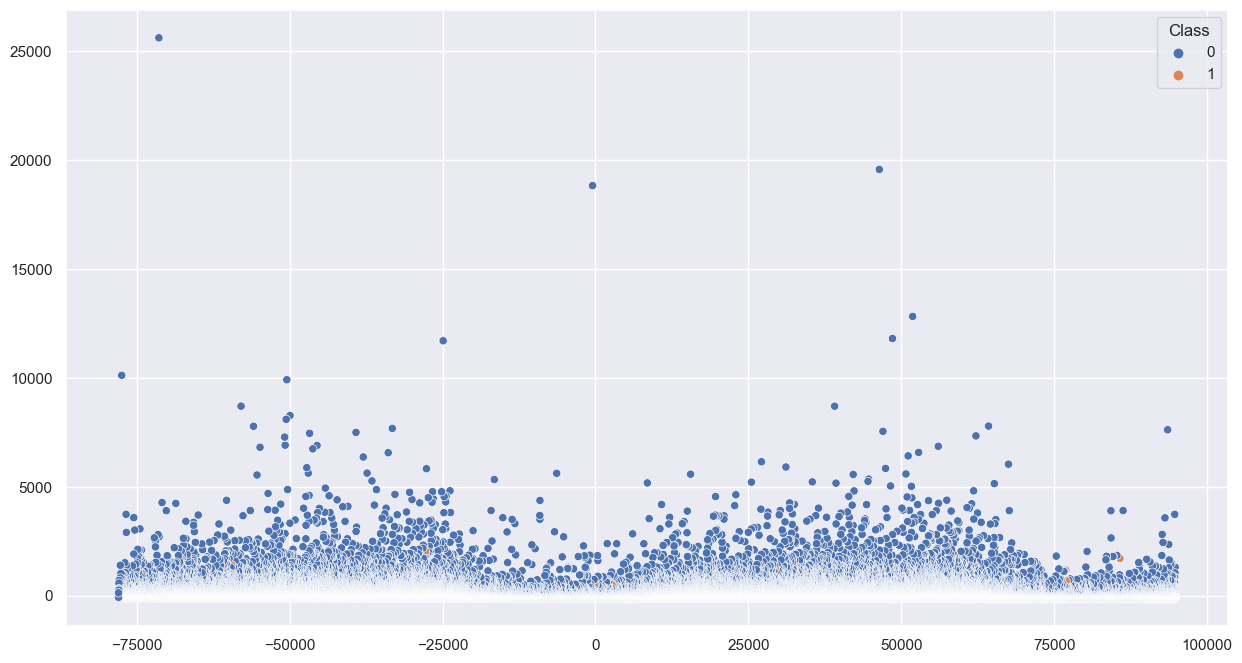

In [8]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x=pca_X[:, 0],
    y=pca_X[:, 1],
    hue=y
)

<Axes: >

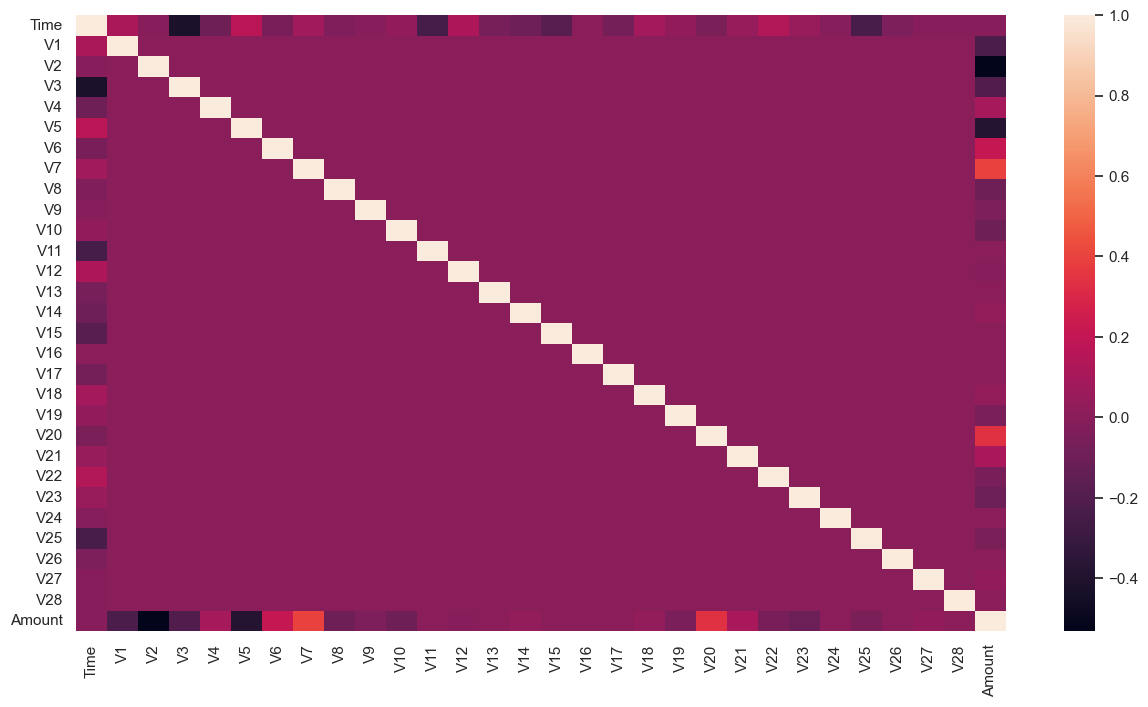

In [9]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, ax=ax)

<Axes: xlabel='Time', ylabel='Count'>

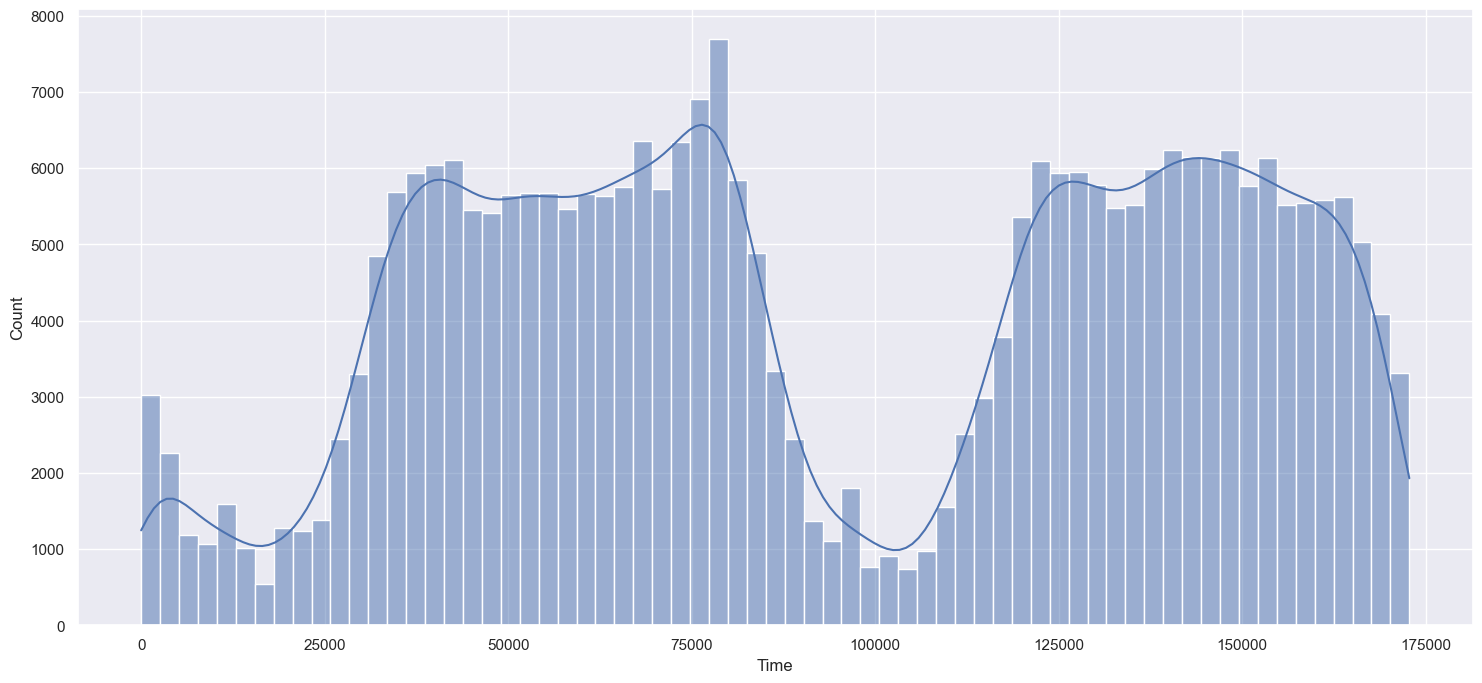

In [10]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.Time, kde=True)

<Axes: xlabel='Amount', ylabel='Count'>

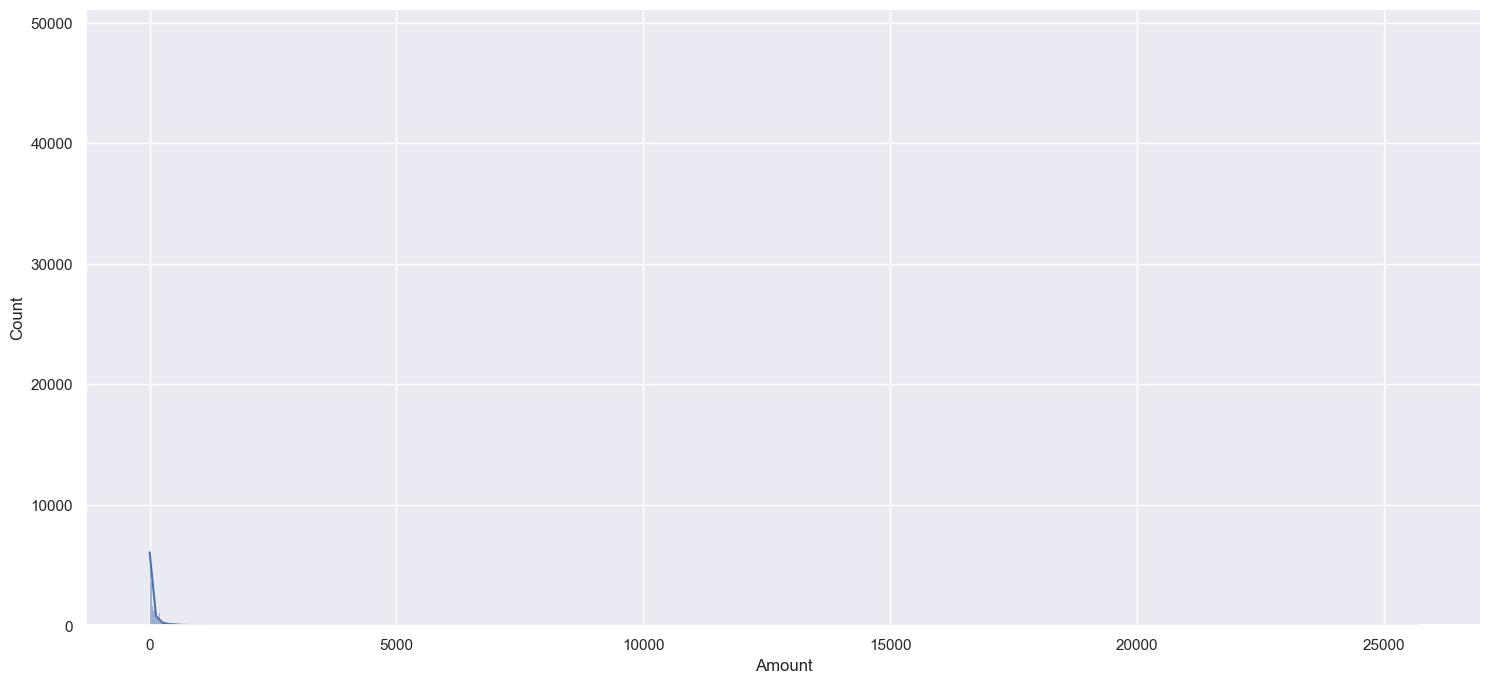

In [11]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.Amount, kde=True)

<Axes: xlabel='V1', ylabel='Count'>

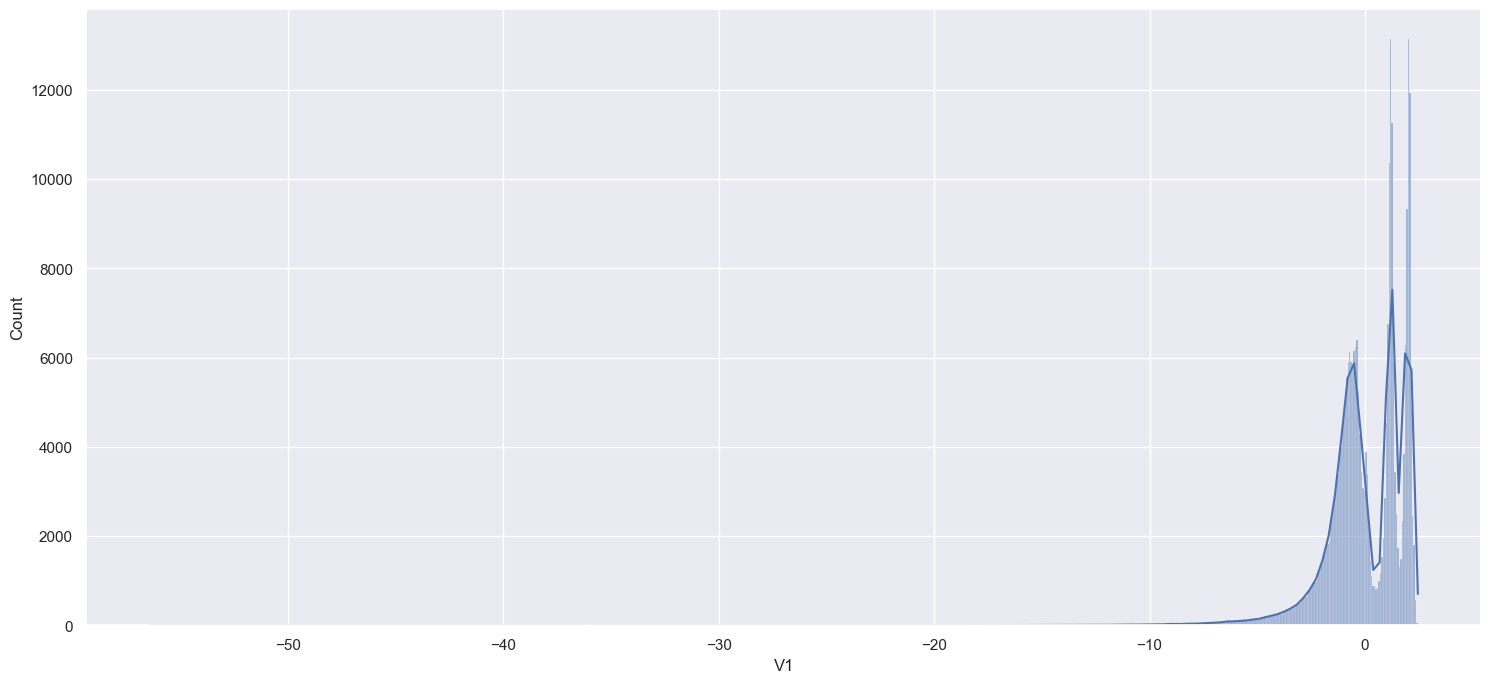

In [12]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V1, kde=True)

<Axes: xlabel='V2', ylabel='Count'>

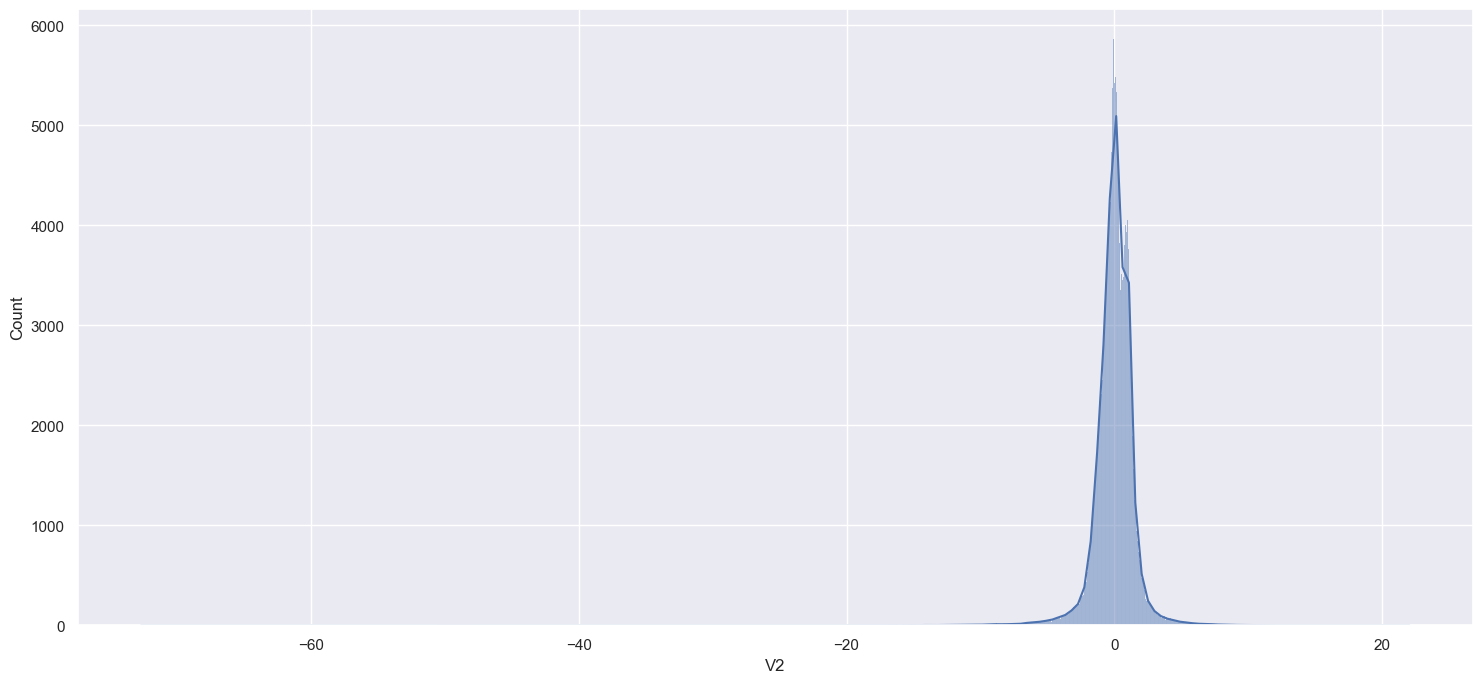

In [13]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V2, kde=True)

<Axes: xlabel='V3', ylabel='Count'>

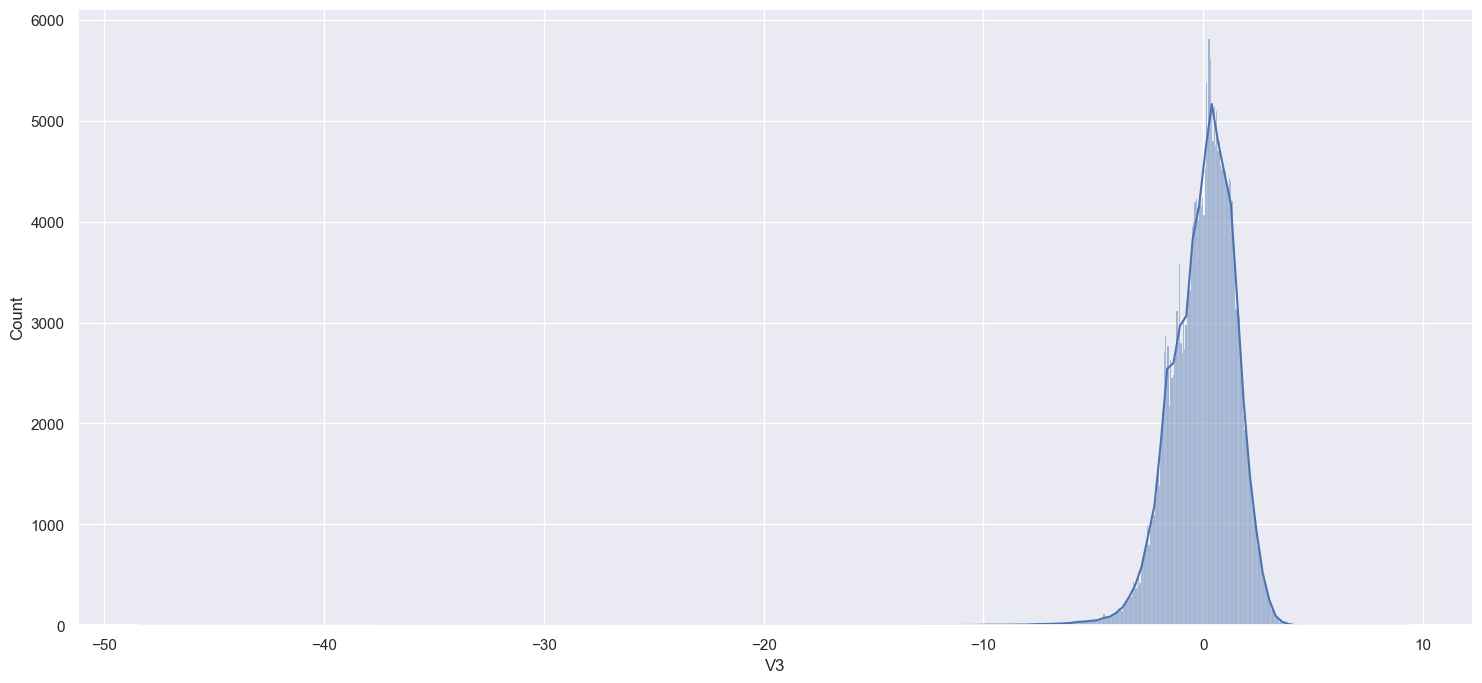

In [14]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V3, kde=True)

<Axes: xlabel='V4', ylabel='Count'>

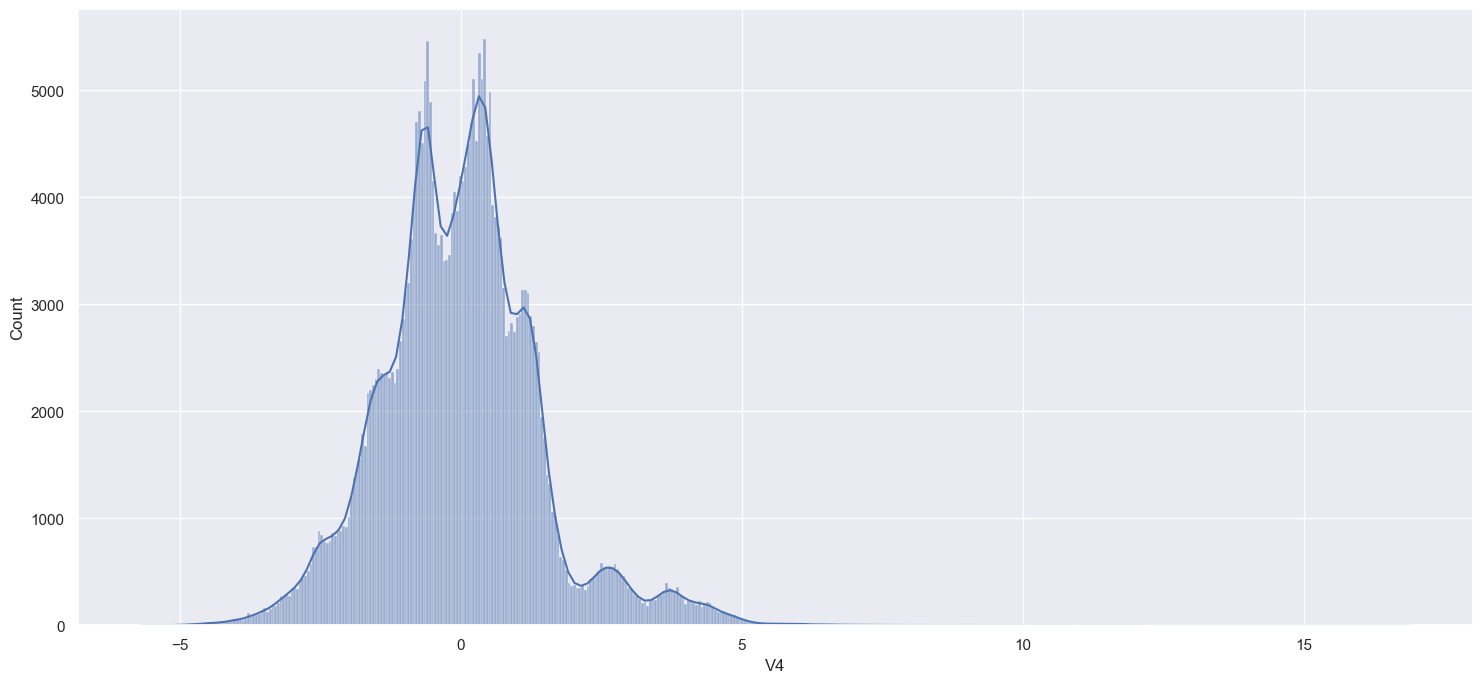

In [15]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V4, kde=True)

<Axes: xlabel='V5', ylabel='Count'>

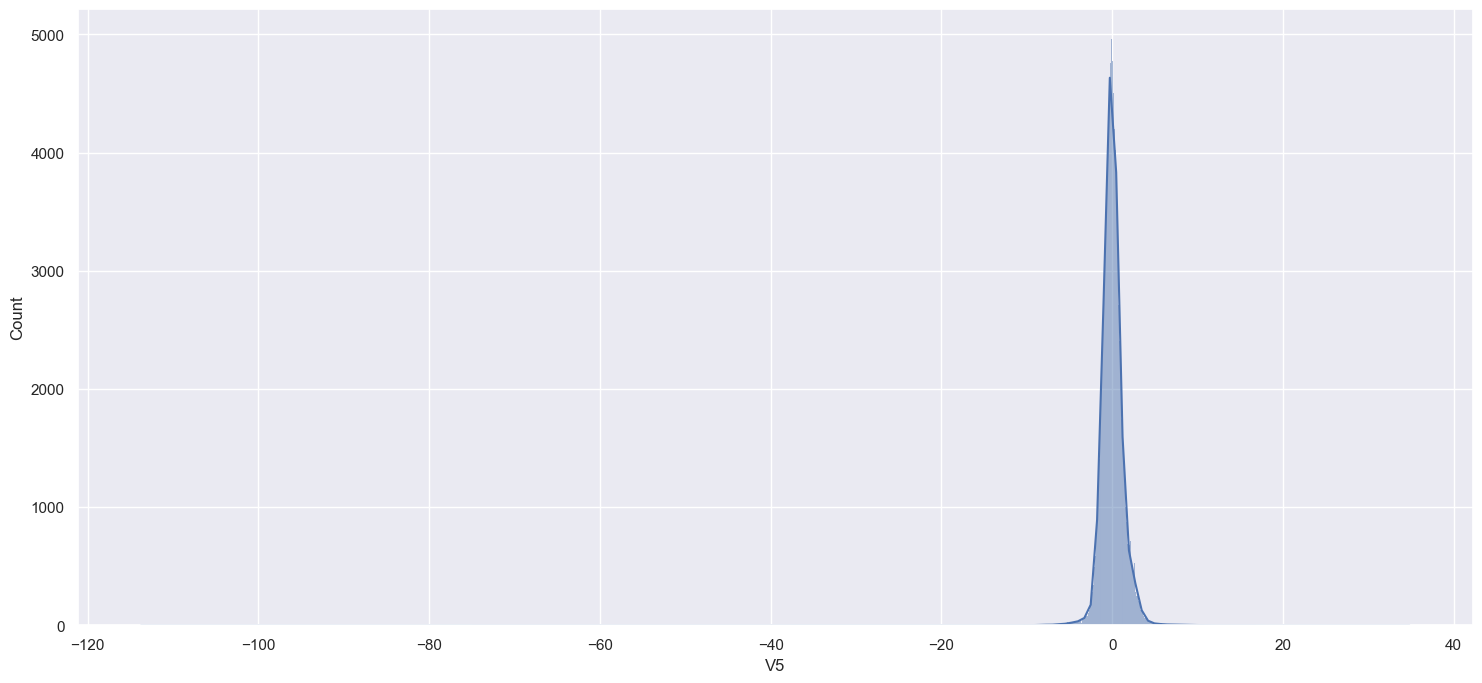

In [16]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V5, kde=True)

<Axes: xlabel='V6', ylabel='Count'>

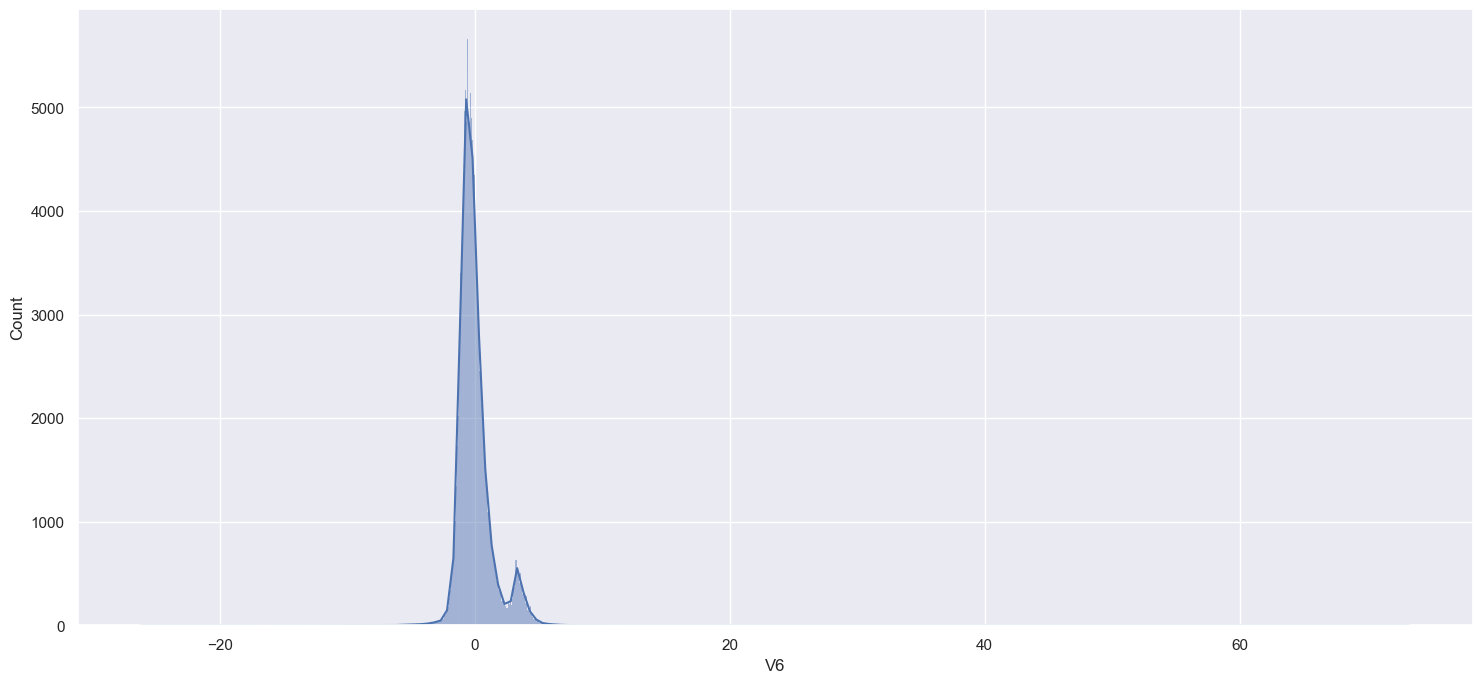

In [17]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V6, kde=True)

<Axes: xlabel='V7', ylabel='Count'>

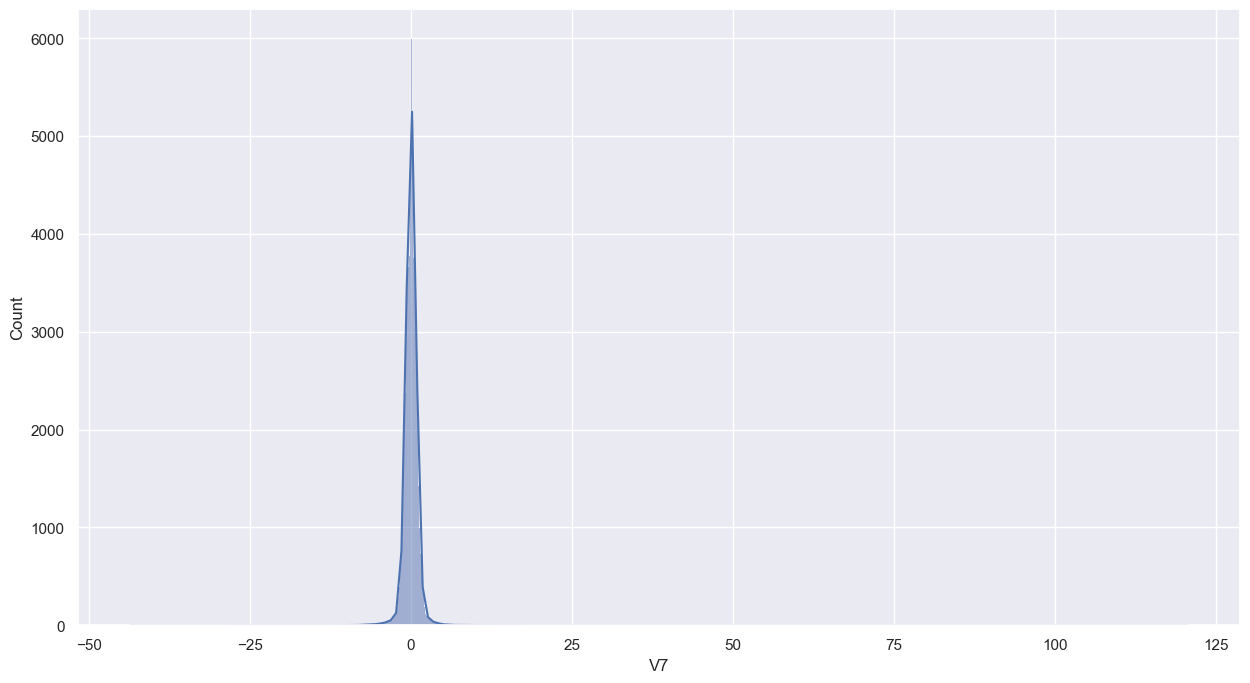

In [19]:
plt.figure(figsize=(15, 8))
sns.histplot(x=X.V7, kde=True)

<Axes: xlabel='V8', ylabel='Count'>

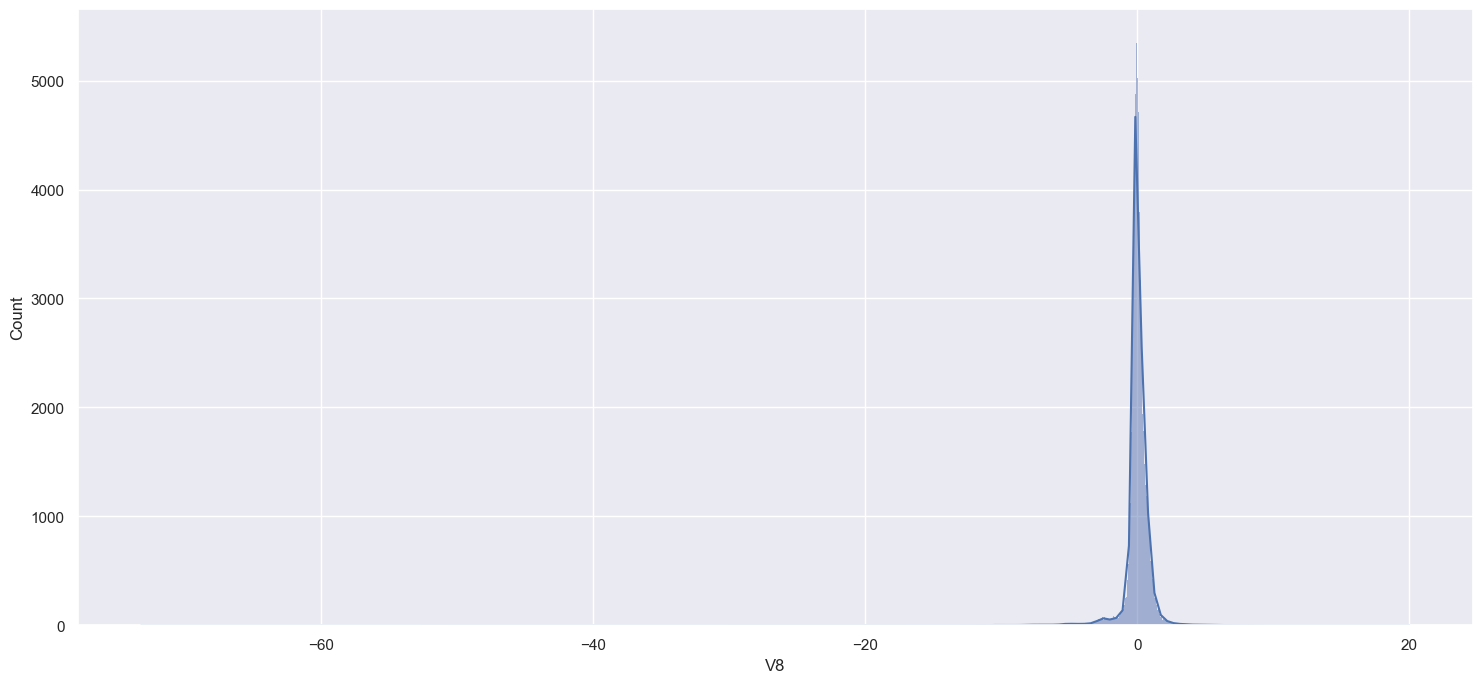

In [20]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V8, kde=True)

<Axes: xlabel='V9', ylabel='Count'>

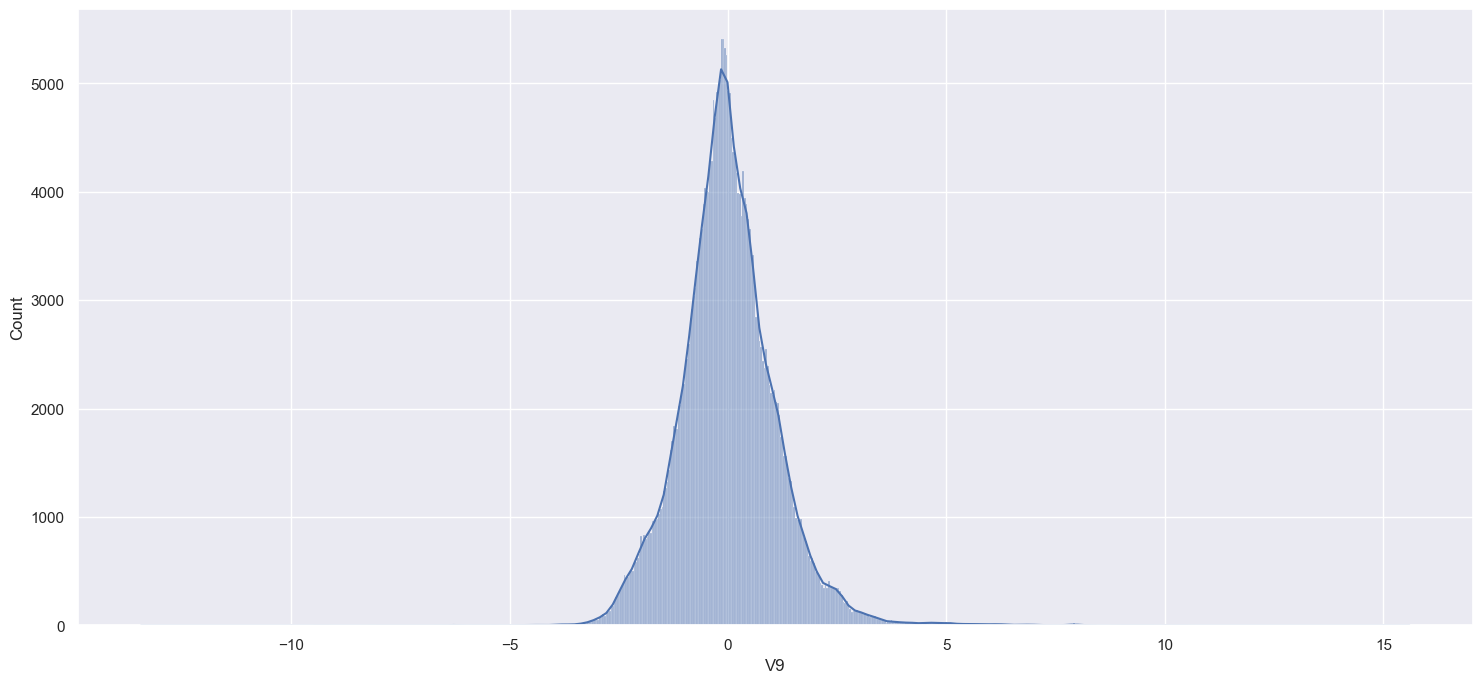

In [21]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V9, kde=True)

<Axes: xlabel='V10', ylabel='Count'>

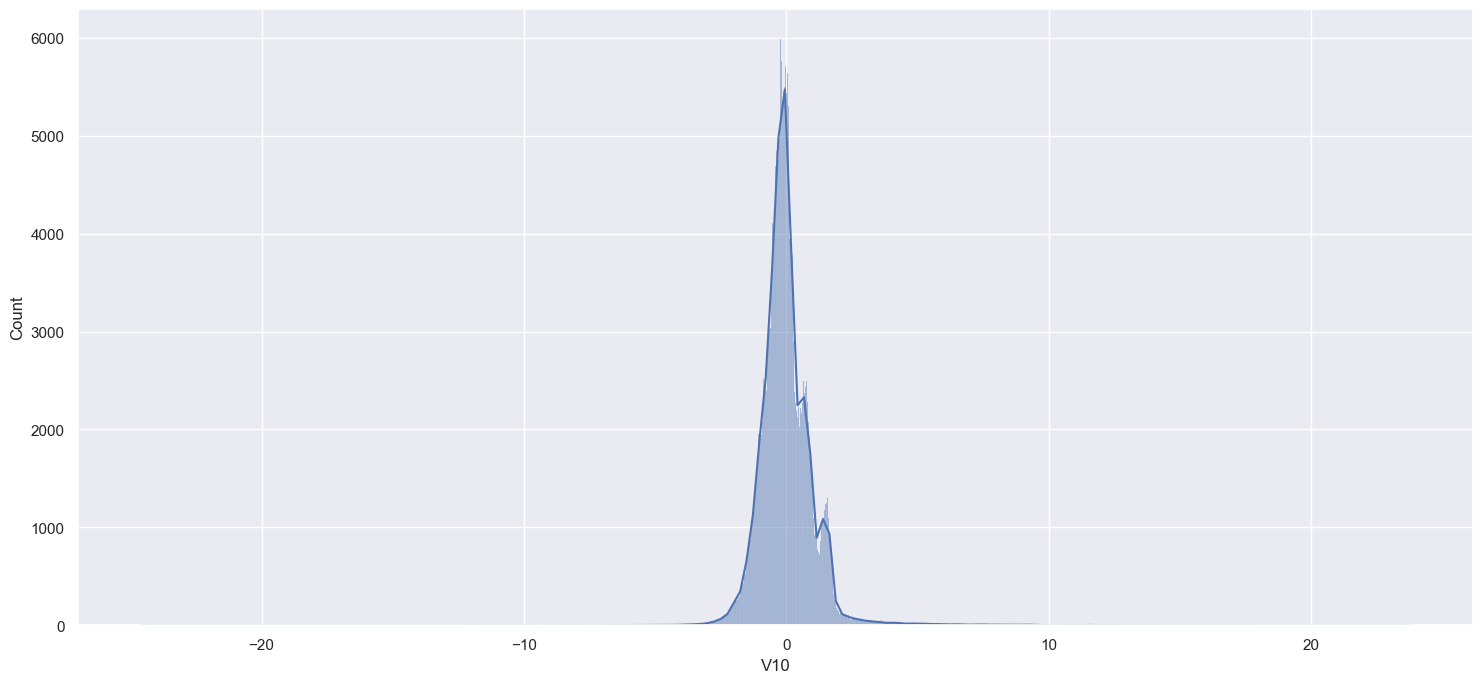

In [22]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V10, kde=True)

<Axes: xlabel='V11', ylabel='Count'>

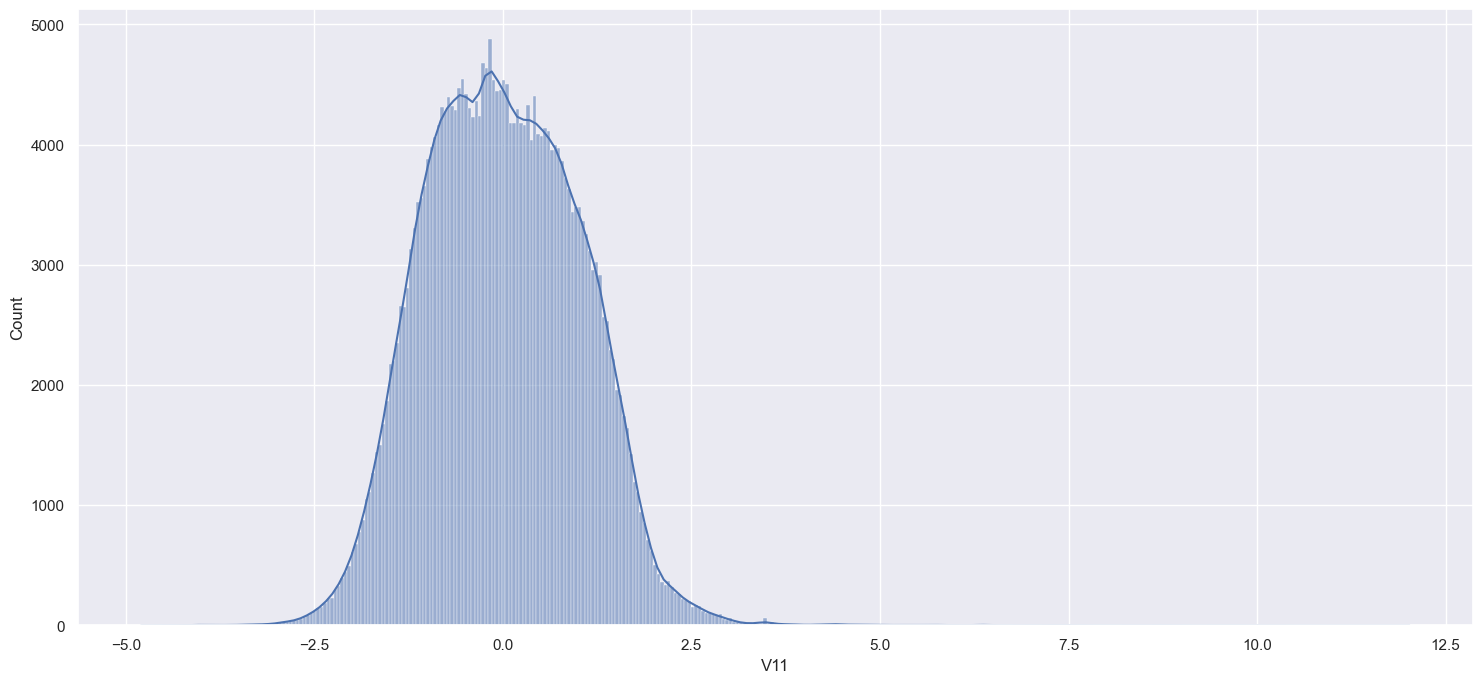

In [23]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V11, kde=True)

<Axes: xlabel='V12', ylabel='Count'>

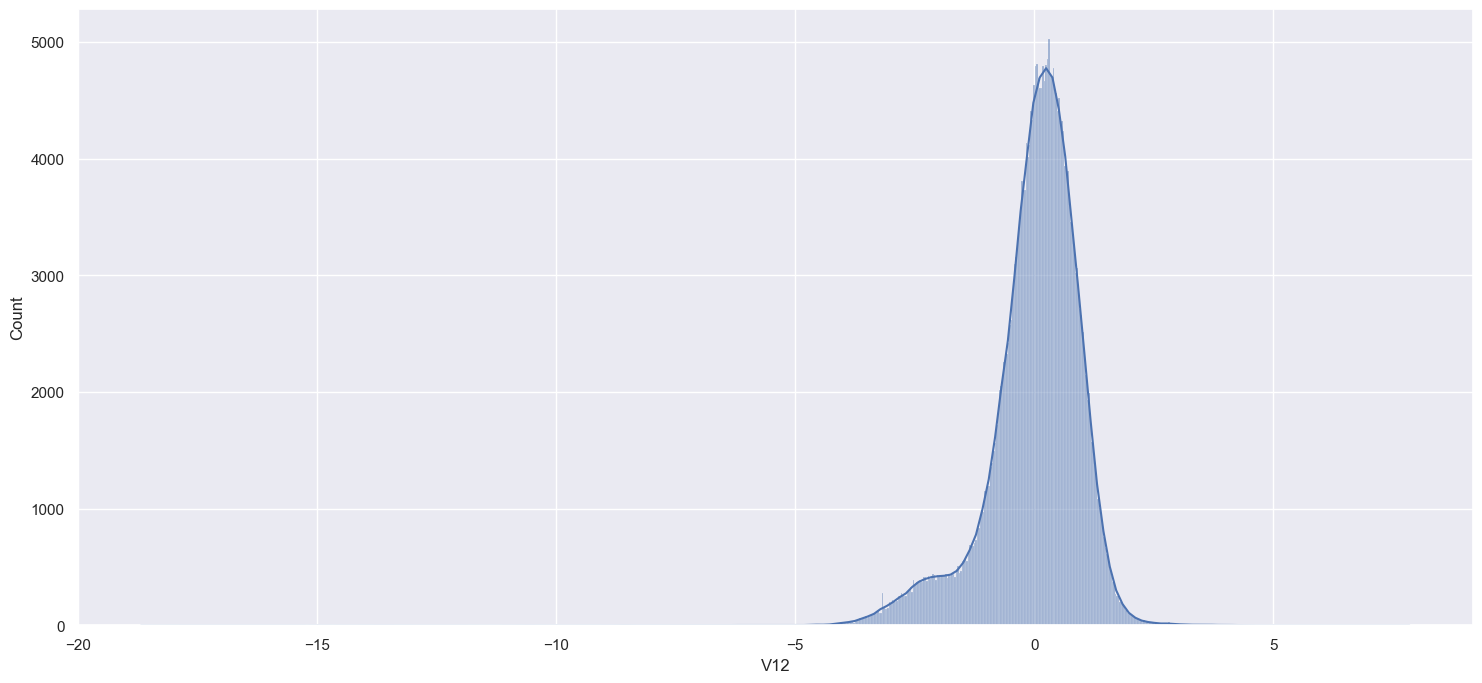

In [24]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V12, kde=True)

<Axes: xlabel='V13', ylabel='Count'>

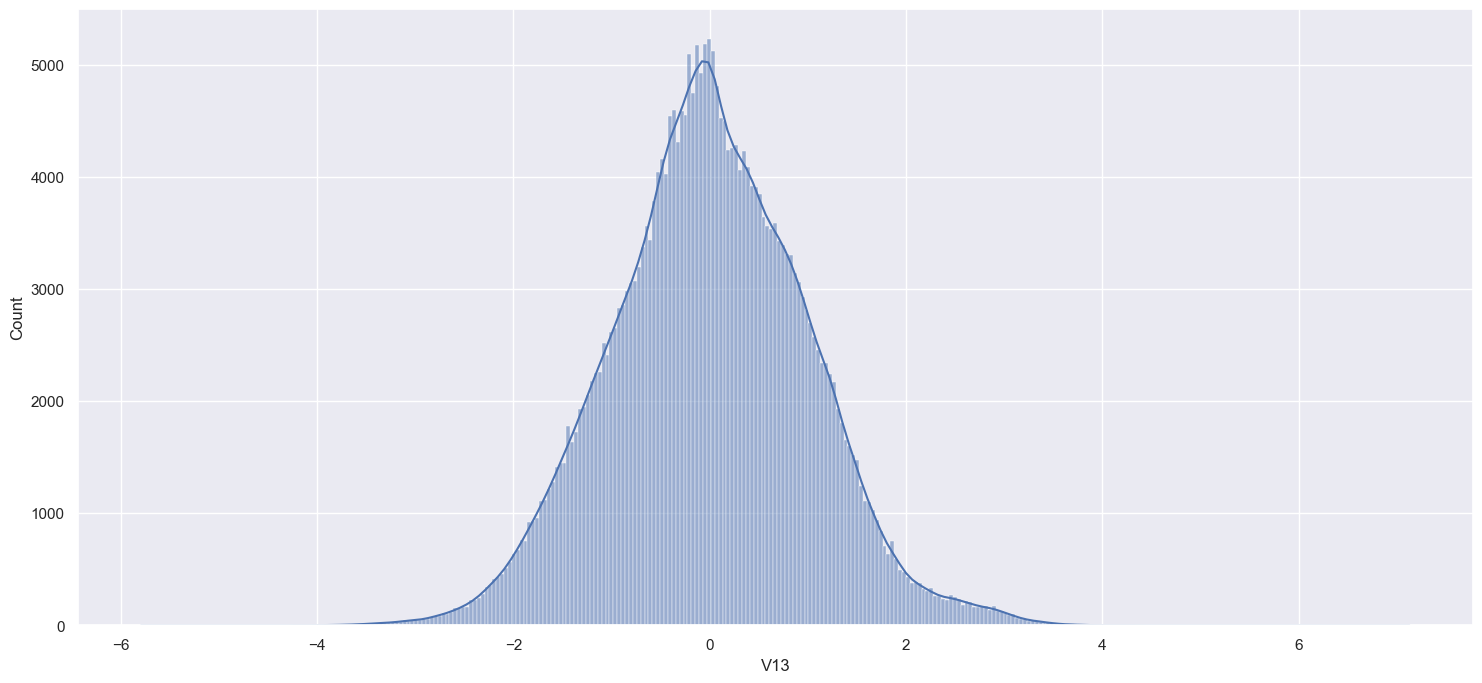

In [25]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V13, kde=True)

<Axes: xlabel='V14', ylabel='Count'>

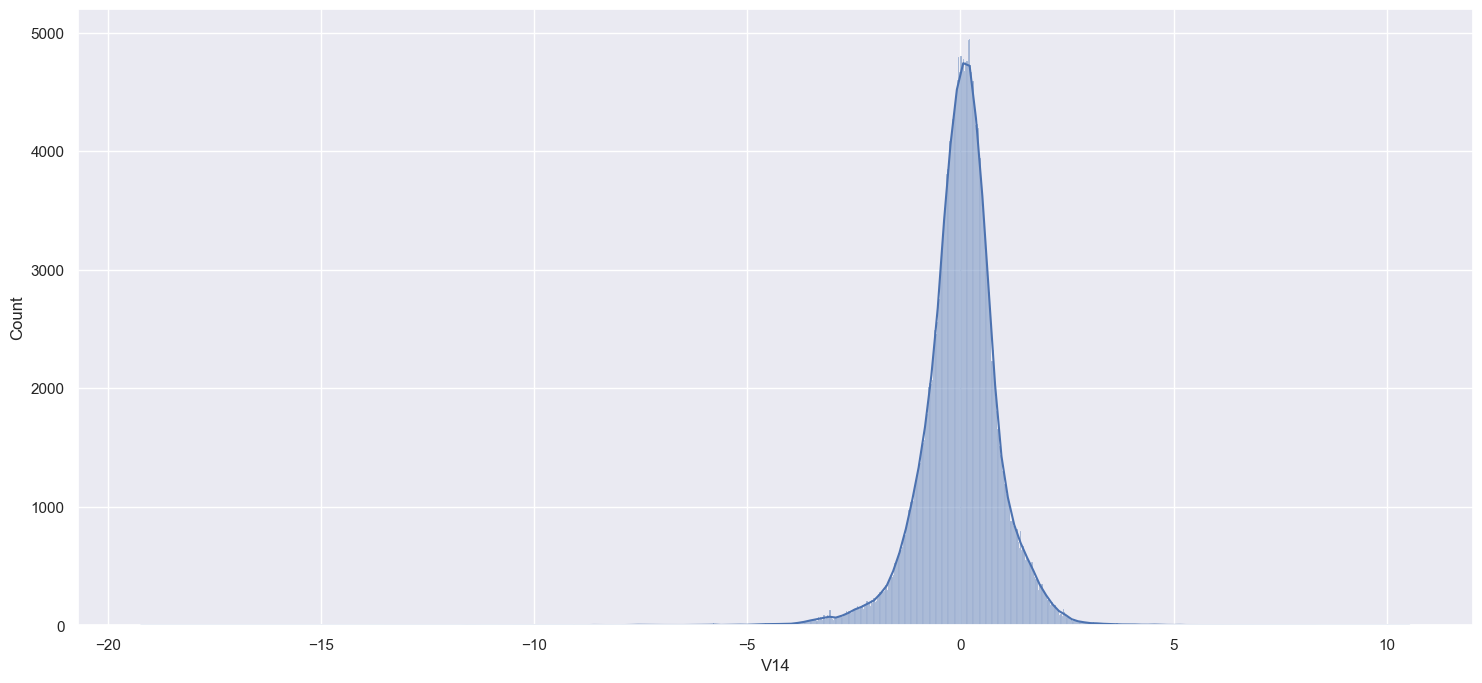

In [26]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V14, kde=True)

<Axes: xlabel='V15', ylabel='Count'>

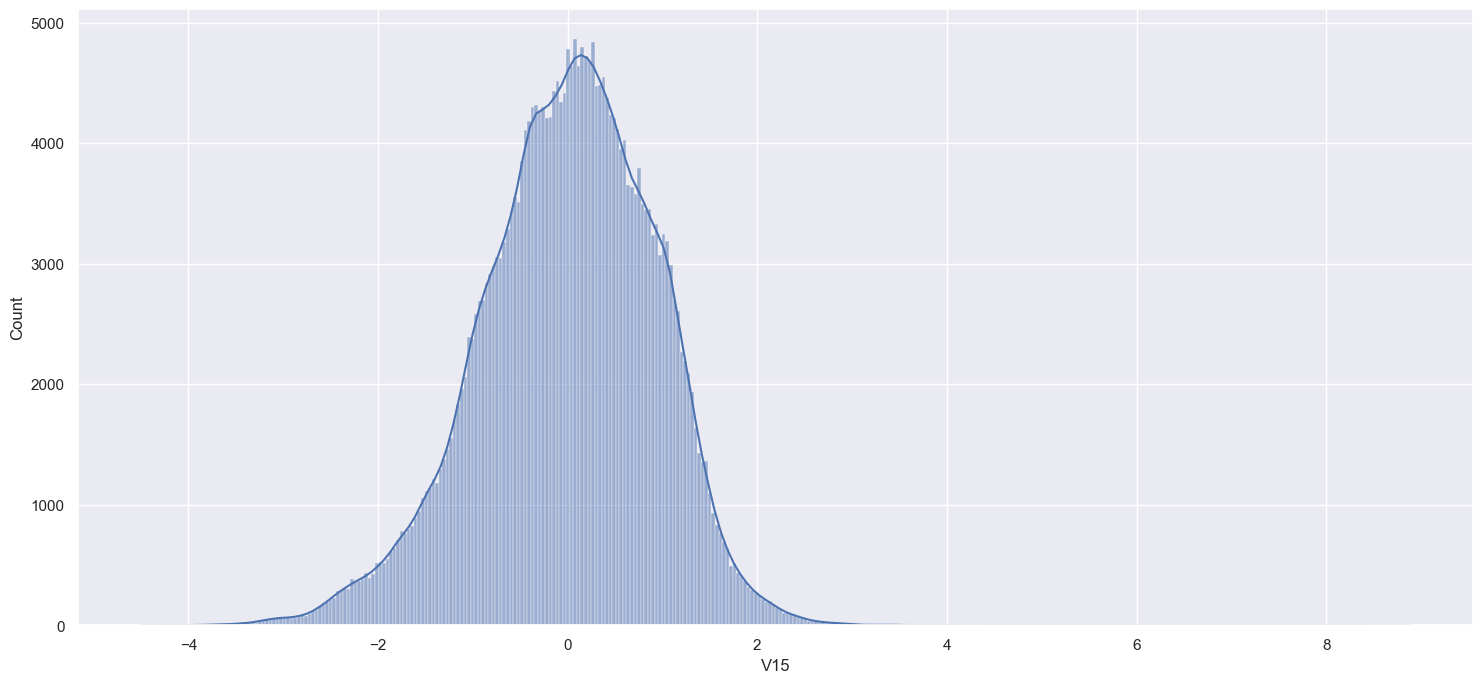

In [27]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V15, kde=True)

<Axes: xlabel='V16', ylabel='Count'>

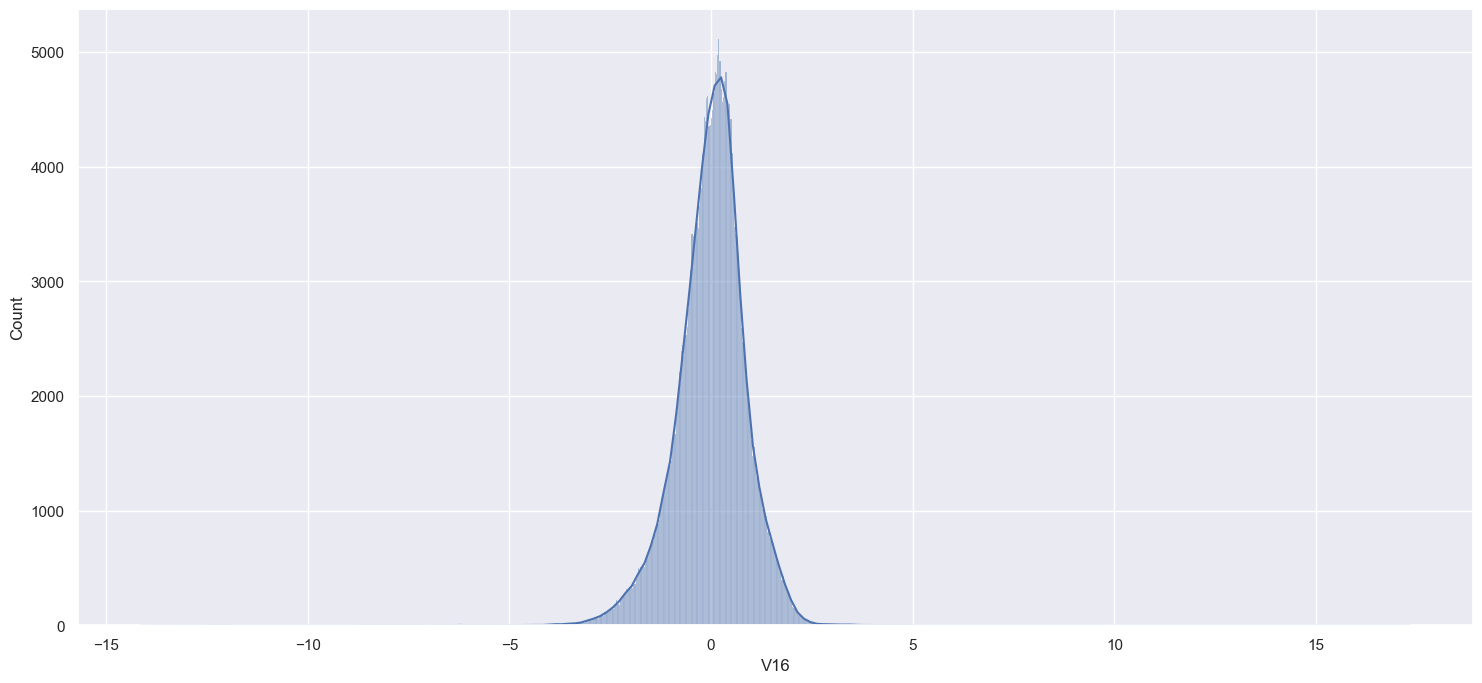

In [28]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V16, kde=True)

<Axes: xlabel='V17', ylabel='Count'>

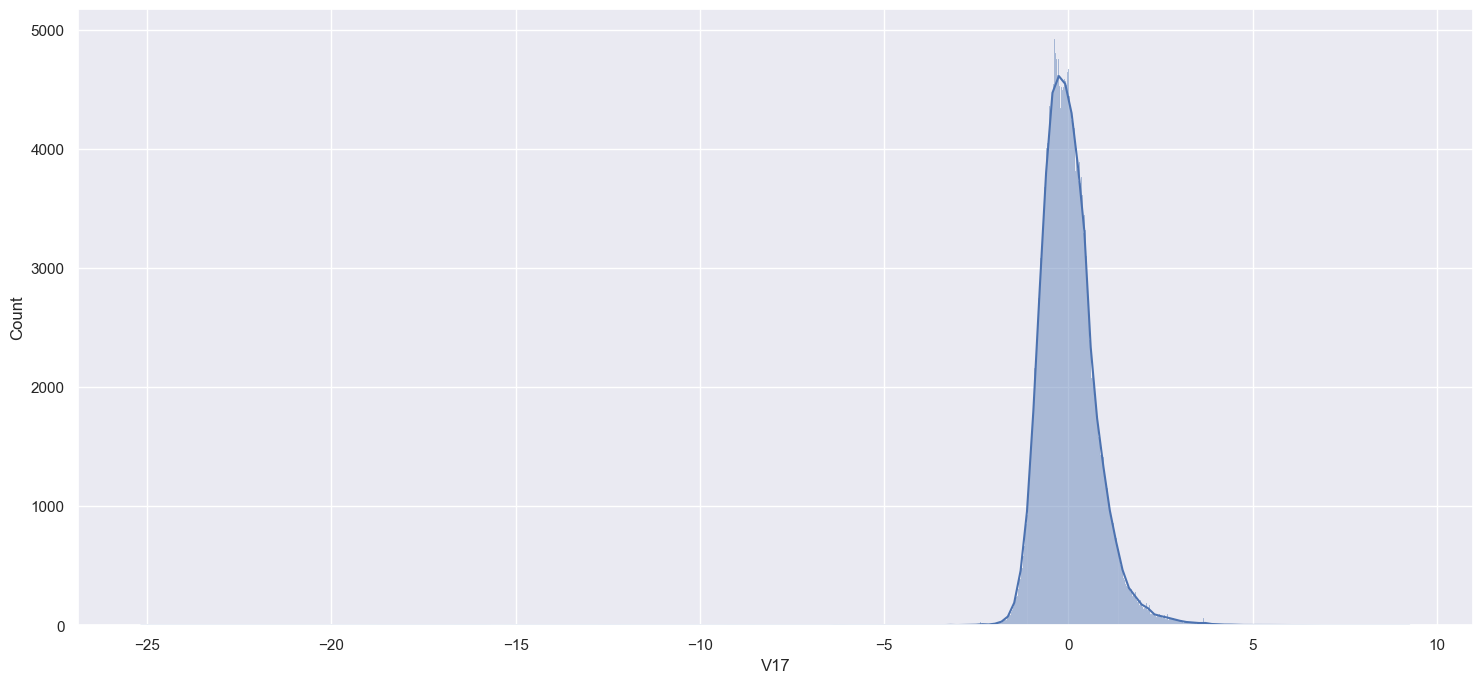

In [29]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V17, kde=True)

<Axes: xlabel='V18', ylabel='Count'>

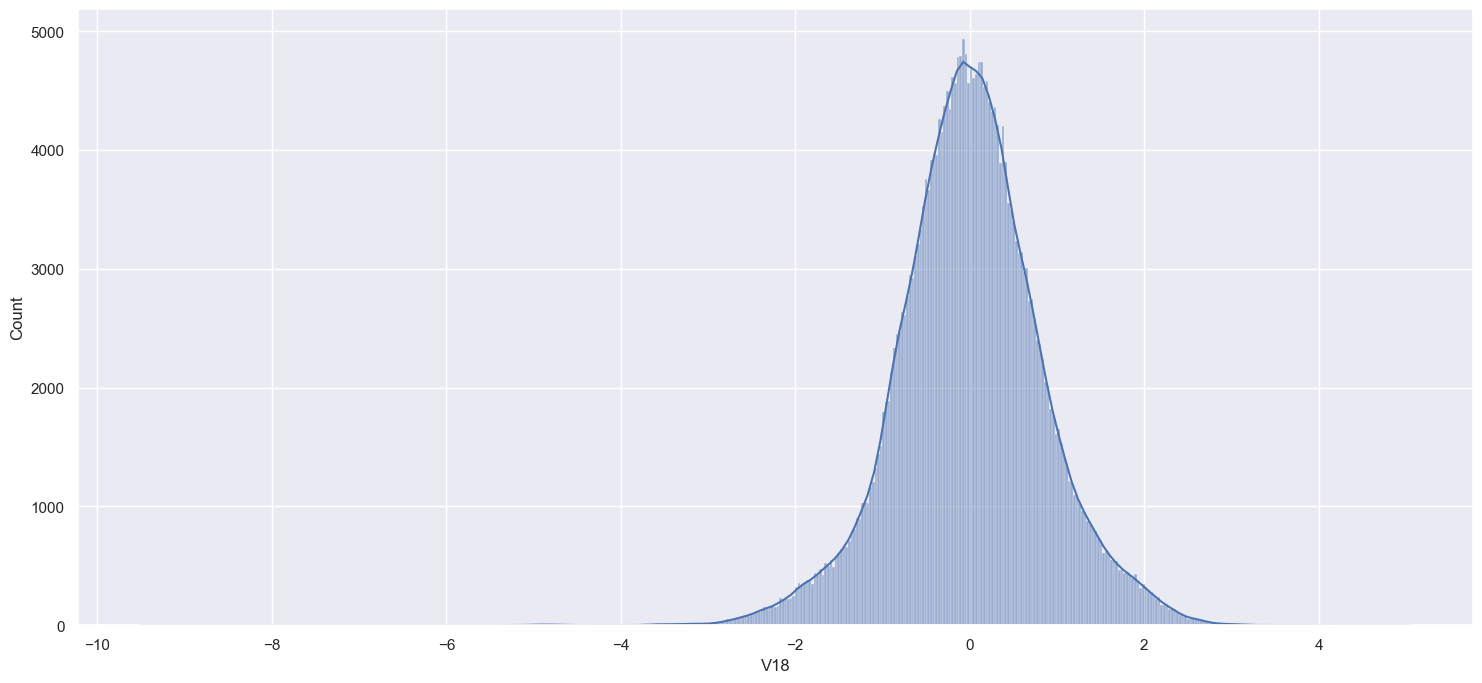

In [30]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V18, kde=True)

<Axes: xlabel='V19', ylabel='Count'>

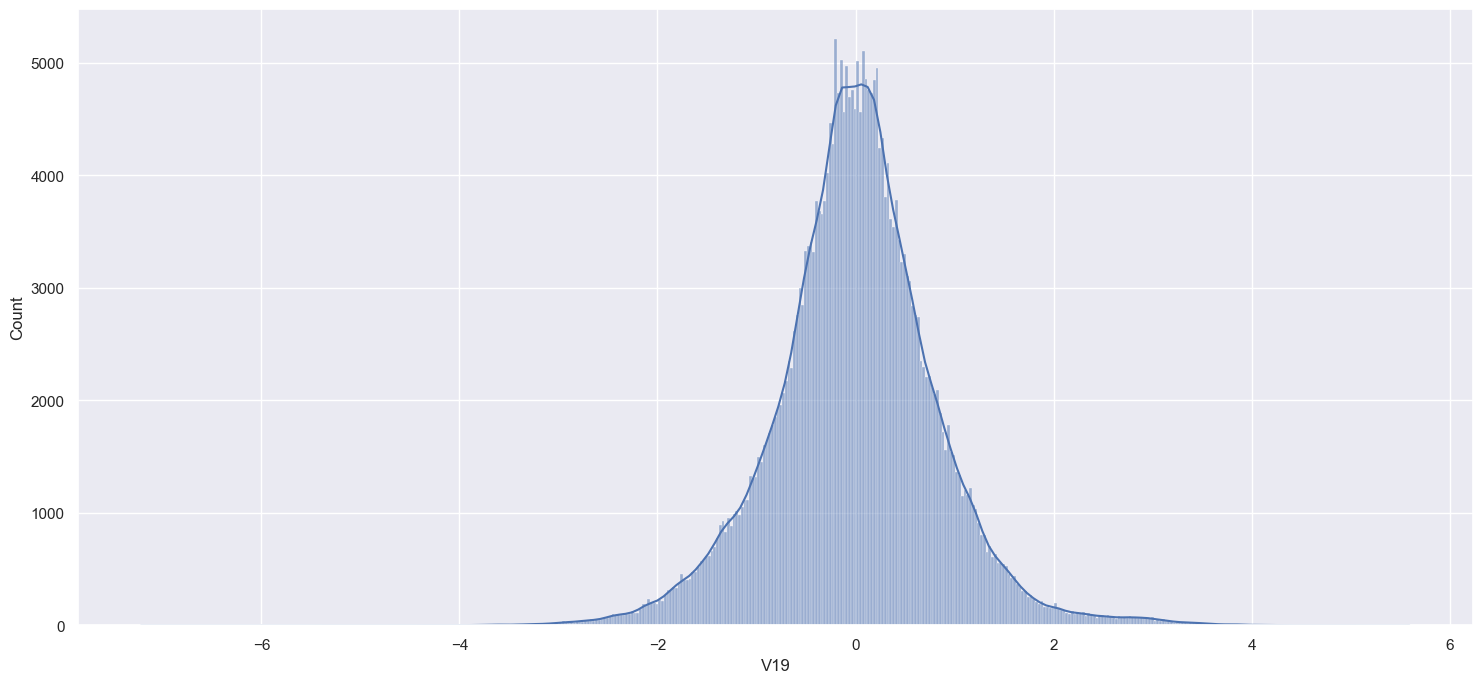

In [31]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V19, kde=True)

<Axes: xlabel='V20', ylabel='Count'>

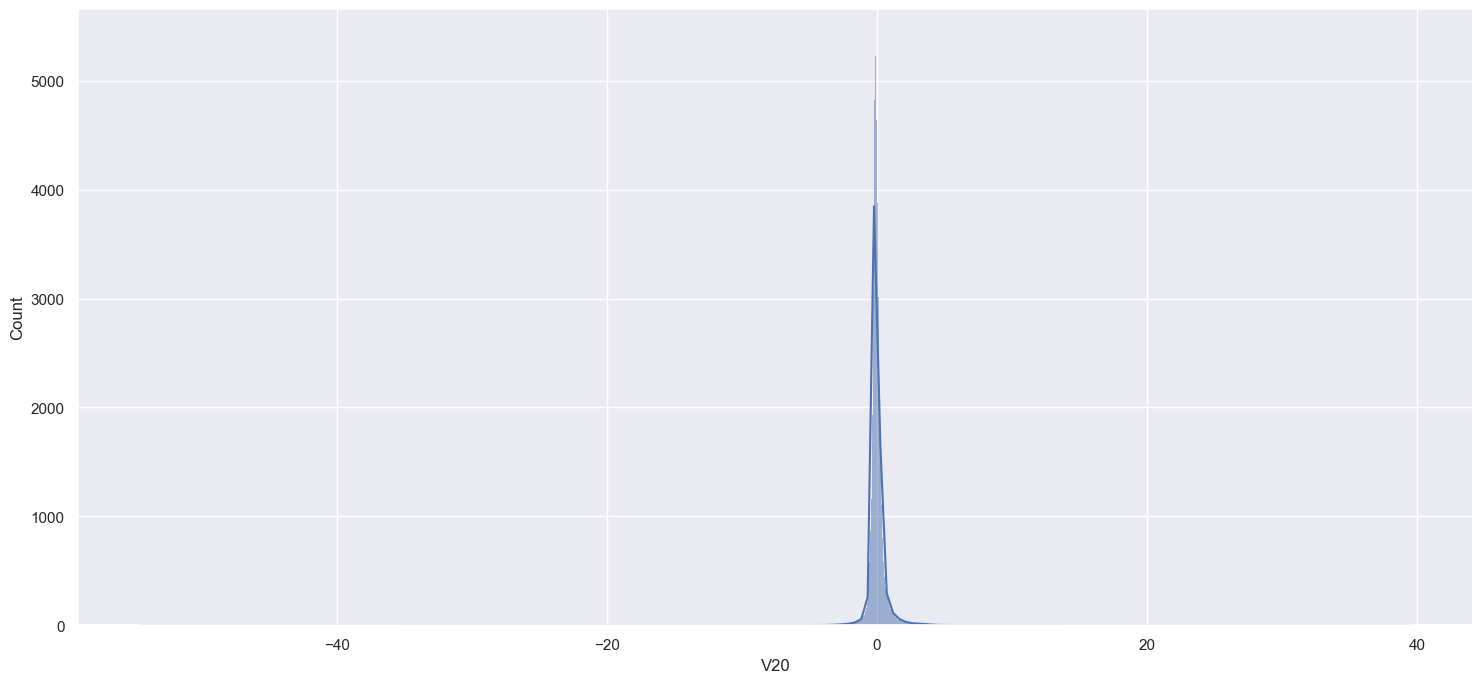

In [32]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V20, kde=True)

<Axes: xlabel='V21', ylabel='Count'>

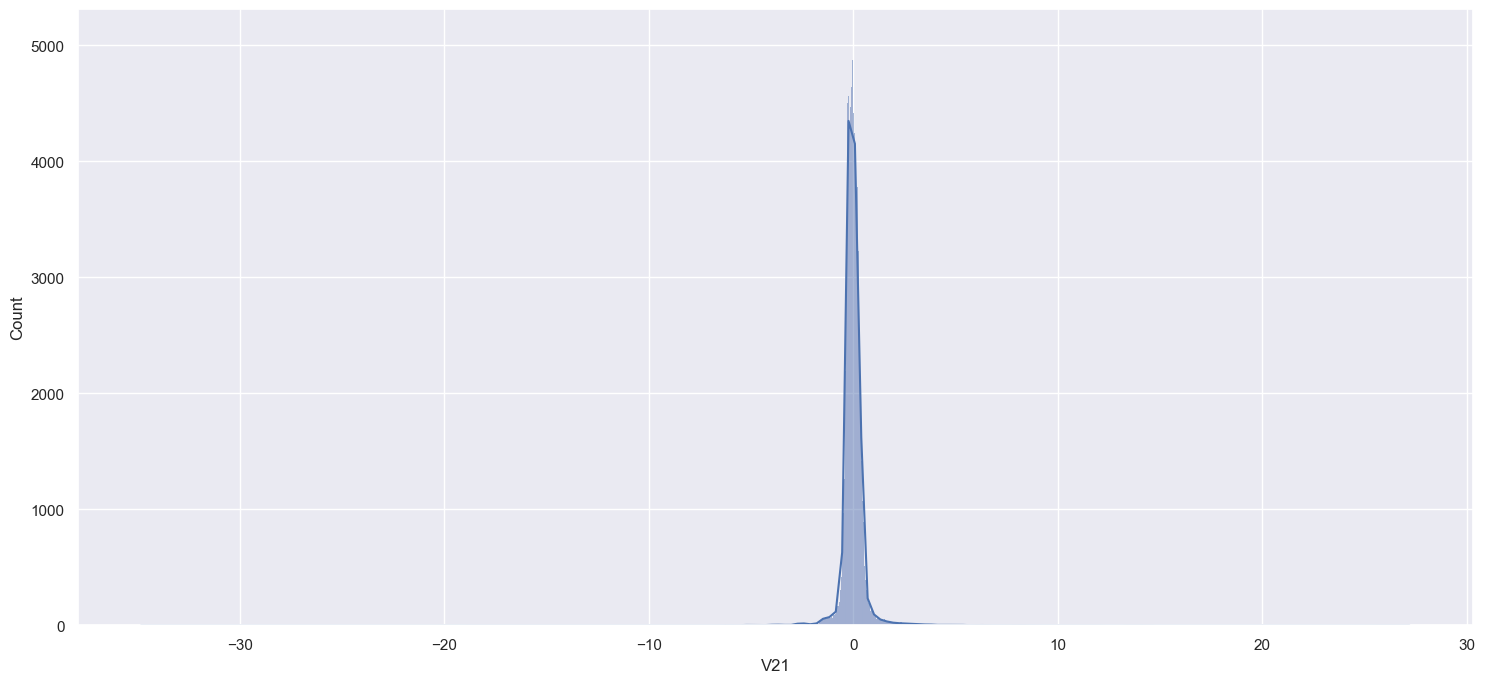

In [33]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V21, kde=True)

<Axes: xlabel='V22', ylabel='Count'>

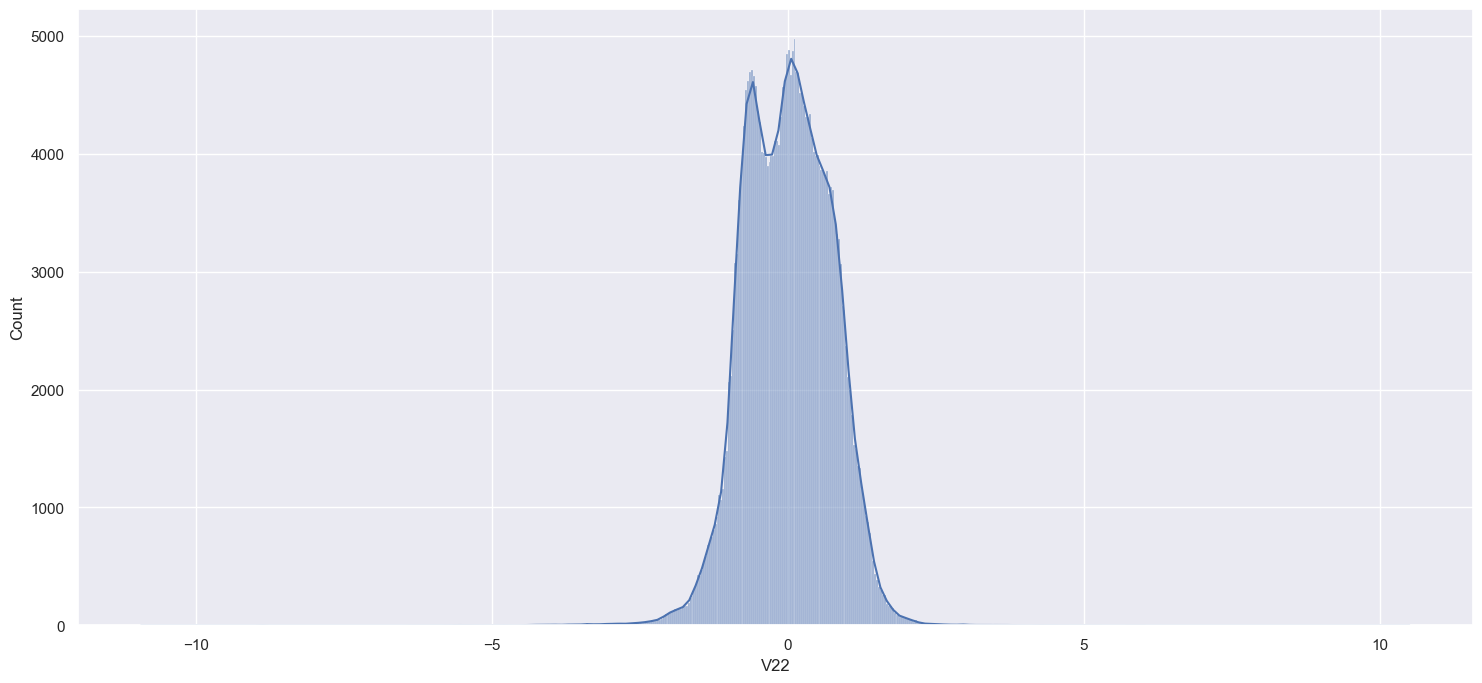

In [34]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V22, kde=True)

<Axes: xlabel='V23', ylabel='Count'>

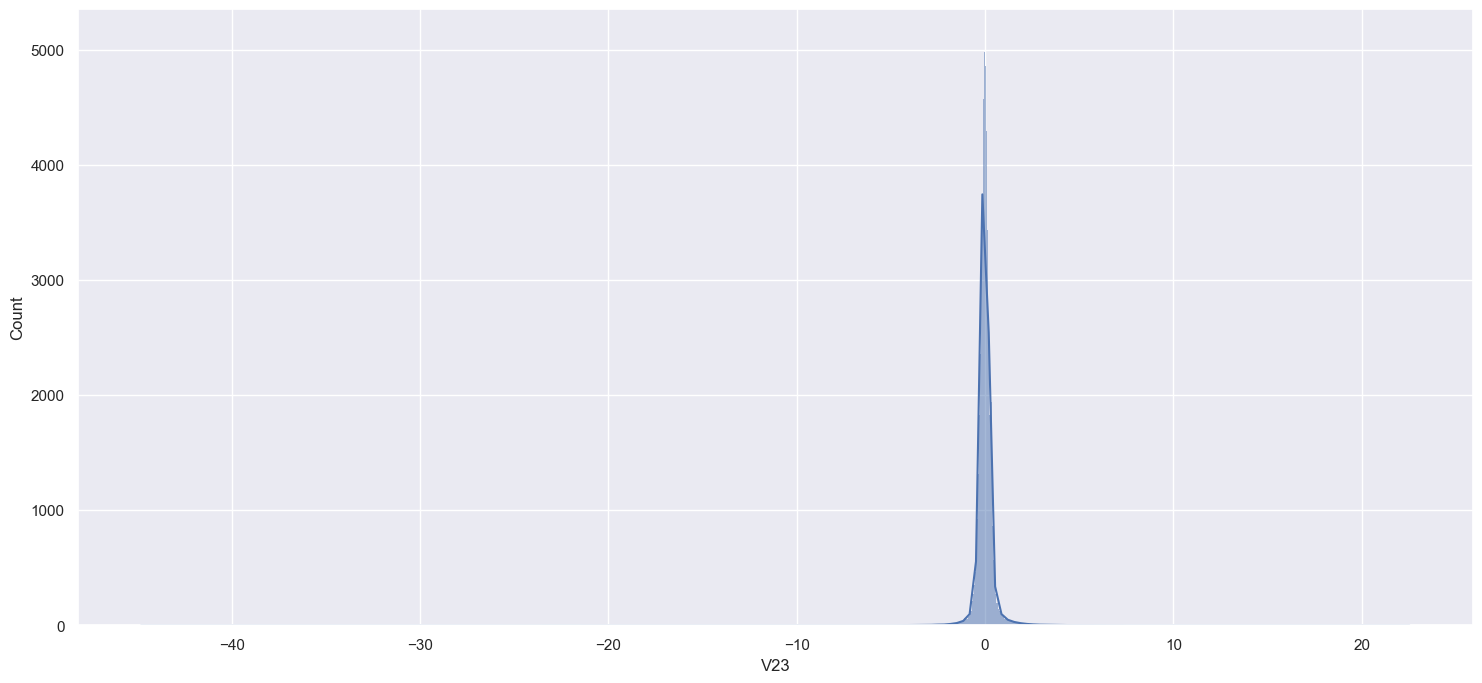

In [35]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V23, kde=True)

<Axes: xlabel='V24', ylabel='Count'>

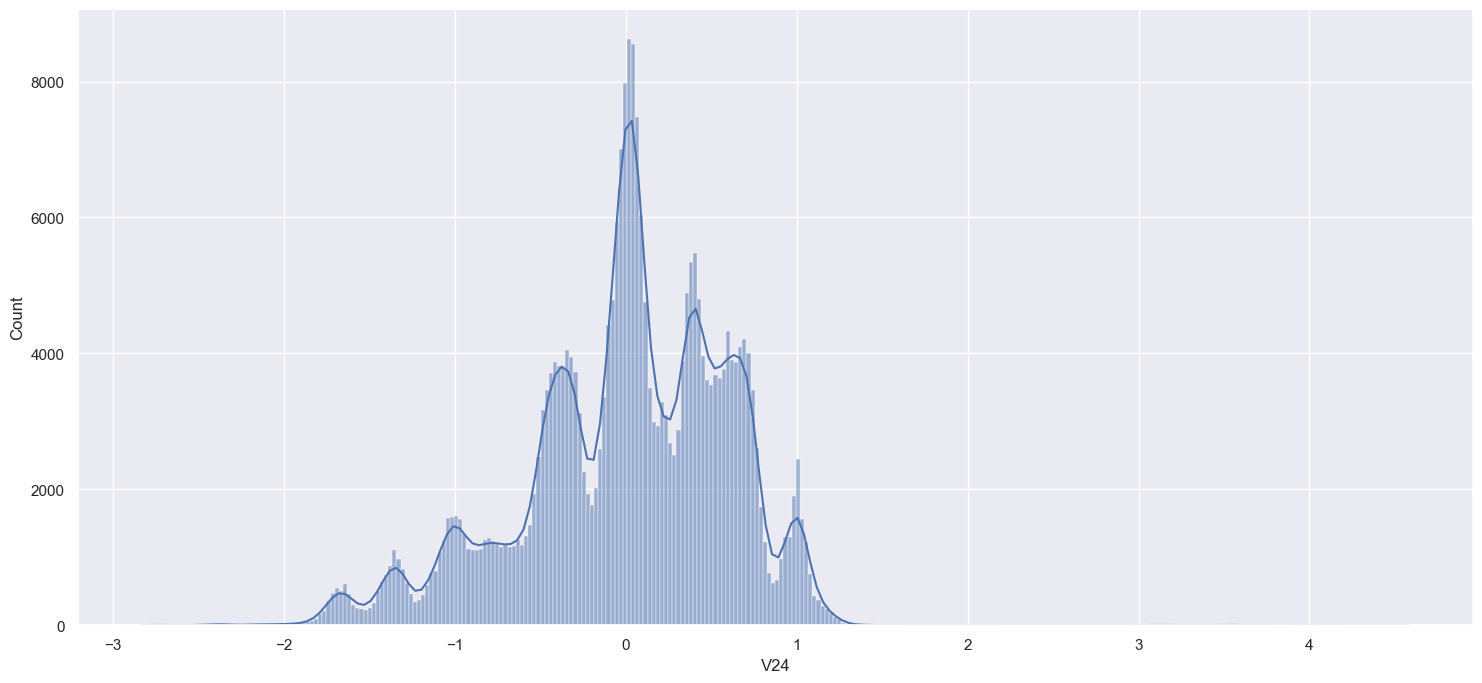

In [36]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V24, kde=True)

<Axes: xlabel='V25', ylabel='Count'>

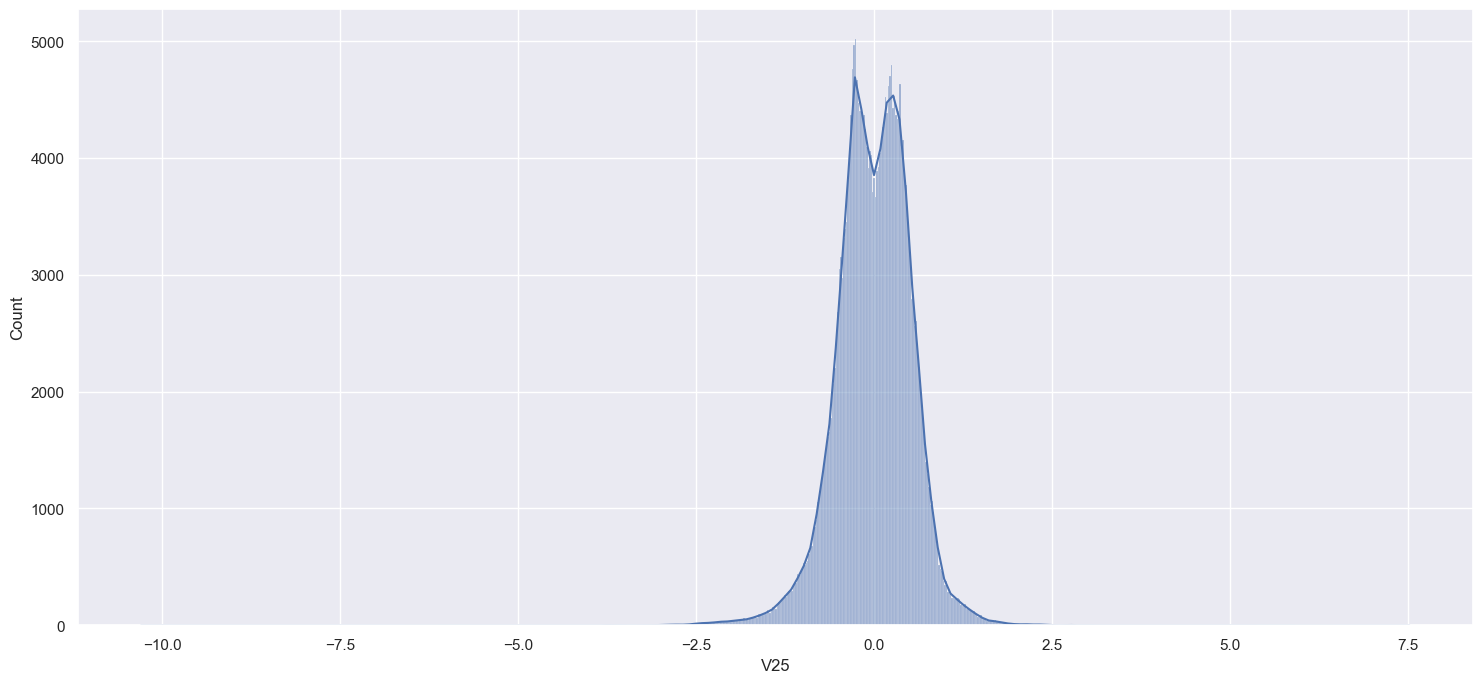

In [37]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V25, kde=True)

<Axes: xlabel='V26', ylabel='Count'>

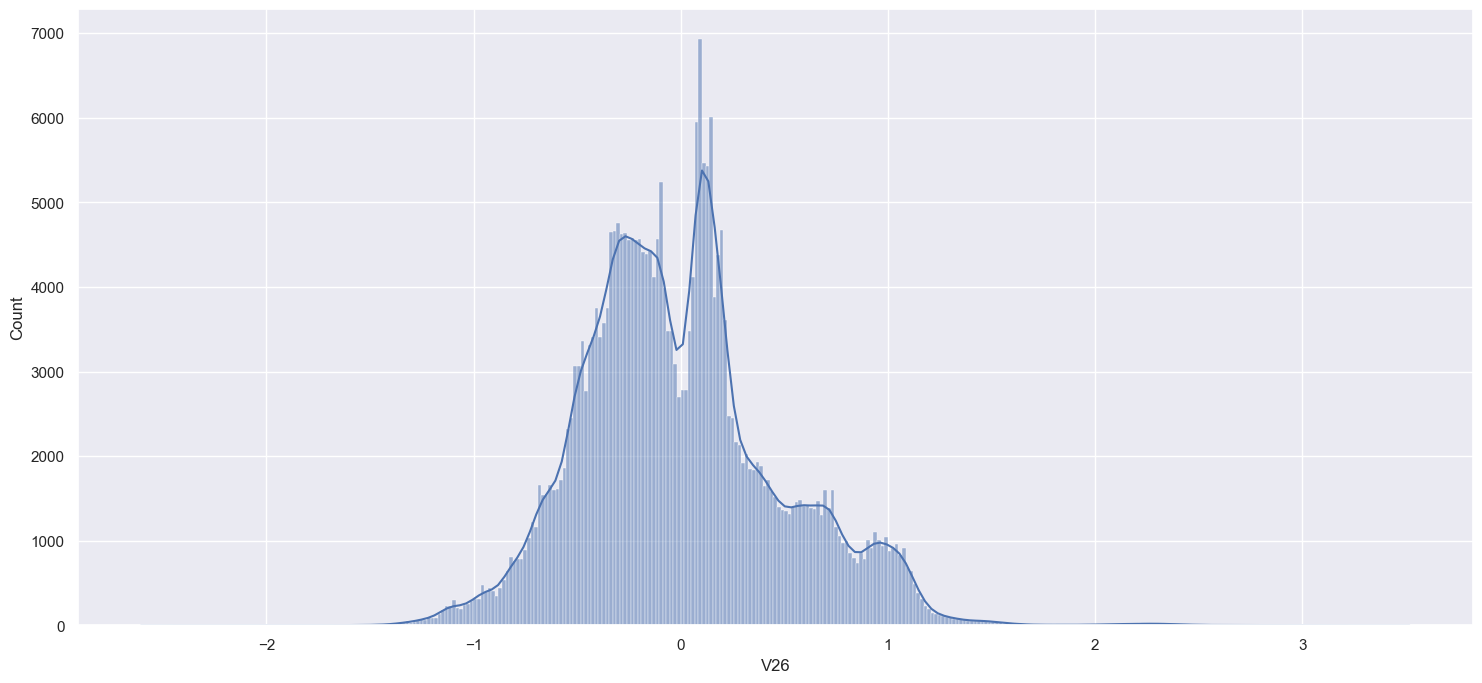

In [38]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V26, kde=True)

<Axes: xlabel='V27', ylabel='Count'>

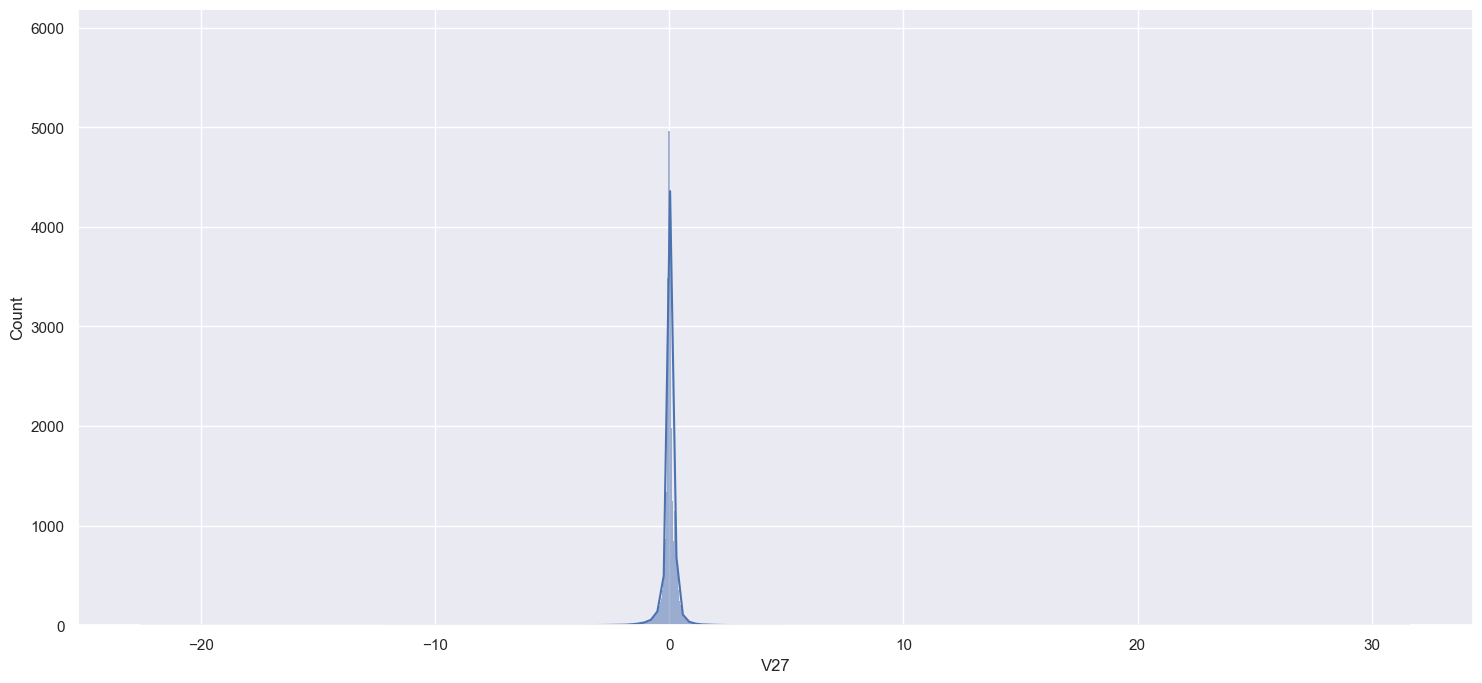

In [39]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V27, kde=True)

<Axes: xlabel='V28', ylabel='Count'>

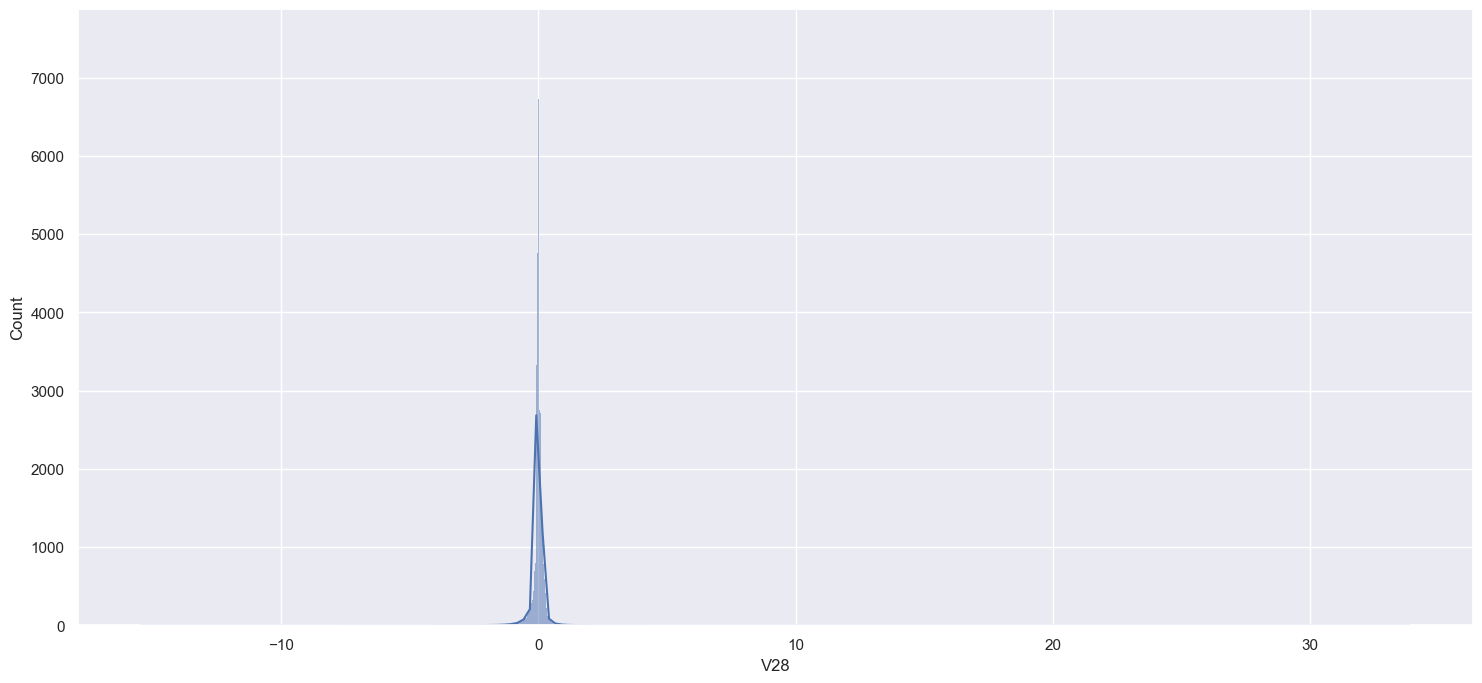

In [40]:
plt.figure(figsize=(18, 8))
sns.histplot(x=X.V28, kde=True)

<Axes: >

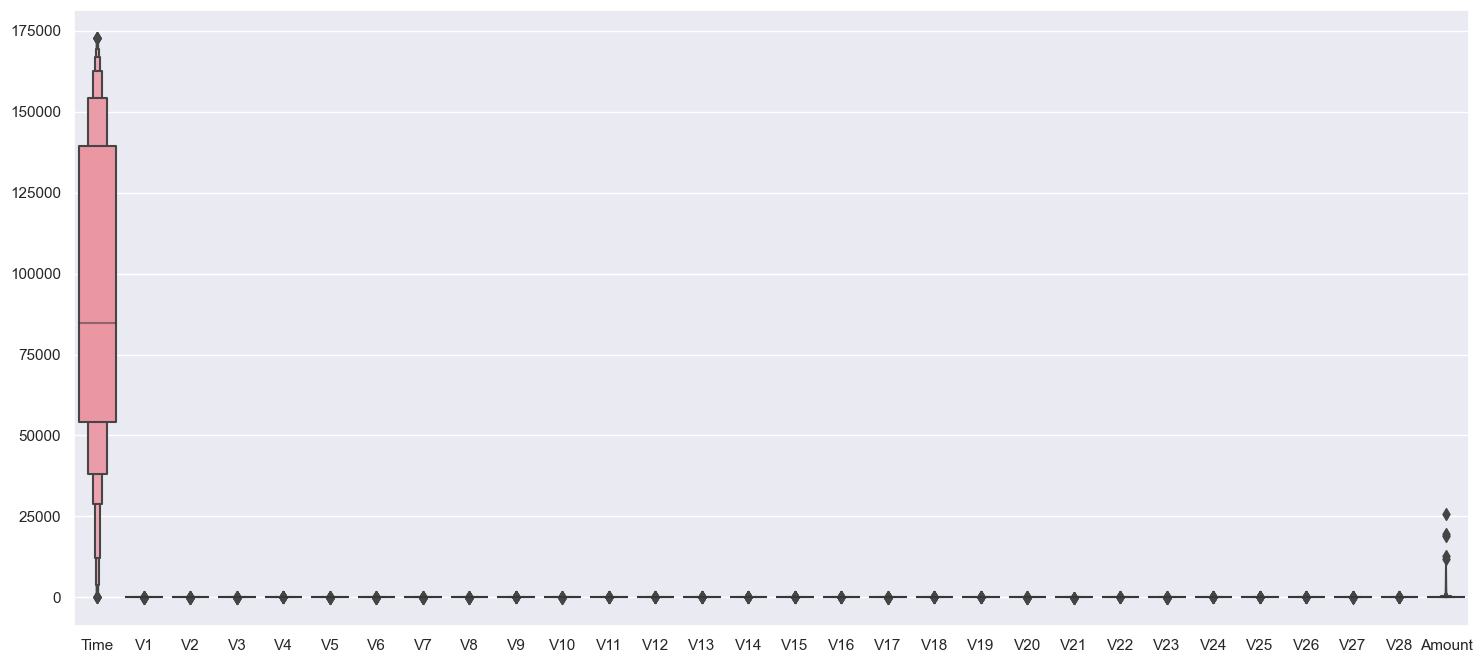

In [41]:
plt.figure(figsize=(18, 8))
sns.boxenplot(data=X)

In [42]:
features_names = X.columns

In [43]:
# Scale Data using Robust Scaler then using Standard Scaler
power_transformation = PowerTransformer()
std_scaler = StandardScaler()
X = power_transformation.fit_transform(X)
X = std_scaler.fit_transform(X)
X = pd.DataFrame(X, columns=features_names)

In [44]:
X

Time        V1        V2        V3        V4        V5        V6  \
0      -2.434947 -0.904815 -0.131503  2.176074  0.983588 -0.256110  0.459227   
1      -2.434947  0.626390  0.093067 -0.035062  0.387928  0.031947  0.045846   
2      -2.434688 -0.904242 -0.871858  1.381297  0.341811 -0.374492  1.320901   
3      -2.434688 -0.742857 -0.202760  1.401049 -0.581136 -0.019151  0.983351   
4      -2.434458 -0.823641  0.530197  1.160592  0.357540 -0.305614  0.187360   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.535206 -3.432267  9.263793 -4.220558 -1.593107 -3.762096 -2.490441   
284803  1.535224 -0.639272 -0.120145  1.646499 -0.481818  0.625614  0.862874   
284804  1.535242  1.309171 -0.274801 -1.858341 -0.340111  1.945994  2.010160   
284805  1.535242 -0.395844  0.277522  0.391172  0.547954 -0.284612  0.572506   
284806  1.535312 -0.545340 -0.205586  0.391870 -0.300213 -0.020774 -0.446724   

              V7         V8        V9  ...       V20       V21       V22  \
0       0.193516   0.020305  0.380443  ...  0.323559 -0.007670  0.366644   
1      -0.063874   0.006711 -0.184488  ... -0.093203 -0.298760 -0.884170   
2       0.639714   0.172348 -1.453859  ...  0.680896  0.357879  1.069496   
3       0.191907   0.309141 -1.319689  ... -0.273184 -0.133275 -0.013060   
4       0.479194  -0.331706  0.769520  ...  0.528646  0.004660  1.107811   
...          ...        ...       ...  ...       ...       ...       ...   
284802 -3.973235  10.735004  1.655831  ...  1.931151  0.310938  0.134616   
284803  0.019492   0.221646  0.571969  ...  0.073879  0.311960  1.290027   
284804 -0.240095   0.674598  0.440417  ... -0.001752  0.336217  0.792165   
284805 -0.554756   0.641383  0.405214  ...  0.162076  0.381266  1.110363   
284806  1.274984  -0.460773  0.487039  ...  0.495210  0.375591  0.884866   

             V23       V24       V25       V26       V27       V28    Amount  
0      -0.189647  0.015102  0.211929 -0.323884  0.323027 -0.053332  1.119013  
1       0.153342 -0.637483  0.288440  0.353130 -0.035793  0.057491 -1.128464  
2       1.501808 -1.133450 -0.653607 -0.209953 -0.151417 -0.173752  1.623286  
3      -0.317680 -1.756645  1.276336 -0.399896  0.144087  0.201524  1.012504  
4      -0.232990  0.145885 -0.429239  1.053668  0.541488  0.669838  0.692981  
...          ...       ...       ...       ...       ...       ...       ...  
284802  1.680751 -0.884095  3.019127  0.595150  2.440121  2.460015 -1.619788  
284803  0.008840 -1.559571 -1.154194 -0.817484  0.158566 -0.154346  0.096295  
284804 -0.072038  1.111693  0.485832 -0.094638 -0.002183 -0.070437  0.675590  
284805 -0.274423  0.113770 -1.087995  1.130379  0.260400  0.333581 -0.427298  
284806  0.606768 -0.084543 -0.917849 -1.941785 -0.019372  0.054168  1.323200  

[284807 rows x 30 columns]

In [45]:
dfSummary(X)

<Axes: ylabel='Class'>

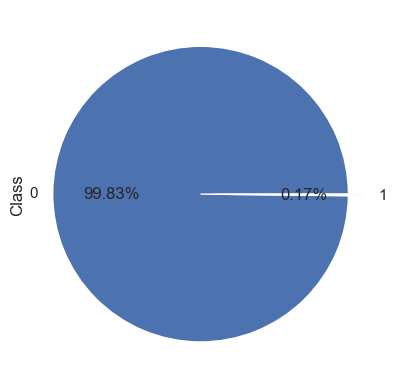

In [46]:
# Check Data Balanced or not
y.value_counts(normalize=True).plot.pie(explode=[0.1, 0], autopct='%1.2f%%')

# Split Data into 80% training and 20% testing

In [47]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    stratify=y,
    random_state=0
)

# Build Model and Evaluate Performance
### In this part we will handle imbalance data using different techniques and then choose the best technique that gave us the best Precision-Recall Curve (AUPRC)

In [50]:
# Function to plot the effect of selected technique and return Precision-Recall Curve (AUPRC) score
def plot_and_get_score(x_train, y_train, technique, x_test, y_test):
    new_x_train, new_y_train = technique.fit_resample(x_train, y_train)
    plt.figure(figsize=(15, 8))
    new_y_train.value_counts(normalize=True).plot.pie(explode=[0.1, 0], autopct='%1.2f%%')
    plt.title("Resampling Result")
    plt.show()
    hist_model = HistGradientBoostingClassifier(random_state=0)
    hist_model.fit(new_x_train, new_y_train)
    y_pred = hist_model.predict(x_test)
    plt.figure(figsize=(15, 8))
    metrics.PrecisionRecallDisplay.from_estimator(
        hist_model,
        x_test,
        y_test
    )
    plt.title("Precision-Recall Curve (AUPRC)")
    plt.show()
    # Data to plot precision - recall curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    auc_precision_recall = metrics.auc(recall, precision)
    return auc_precision_recall

## Over-Sampling Techniques

### Random Over-Sampling

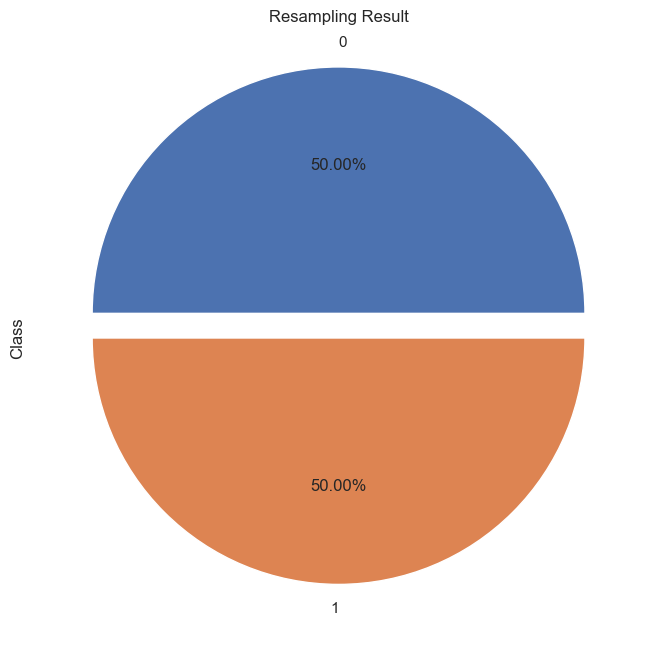

<Figure size 1500x800 with 0 Axes>

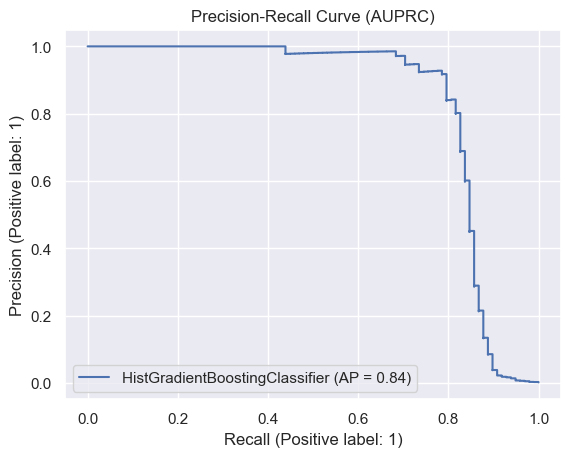

In [51]:
random_over_sampler_score = plot_and_get_score(x_train, y_train, RandomOverSampler(random_state=0), x_test, y_test)

In [52]:
print(f"Random Over-Sampling auc_precision_recall Score is: {random_over_sampler_score}")

Random Over-Sampling auc_precision_recall Score is: 0.8464106013760152


### SMOTE

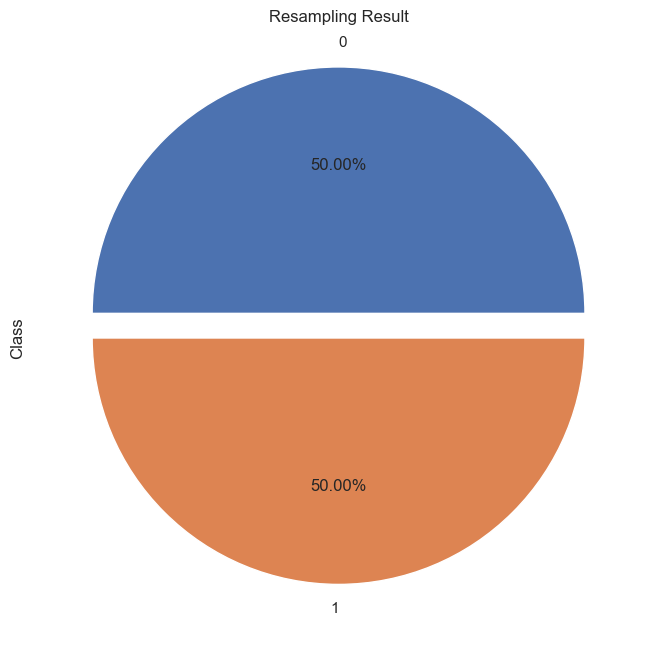

<Figure size 1500x800 with 0 Axes>

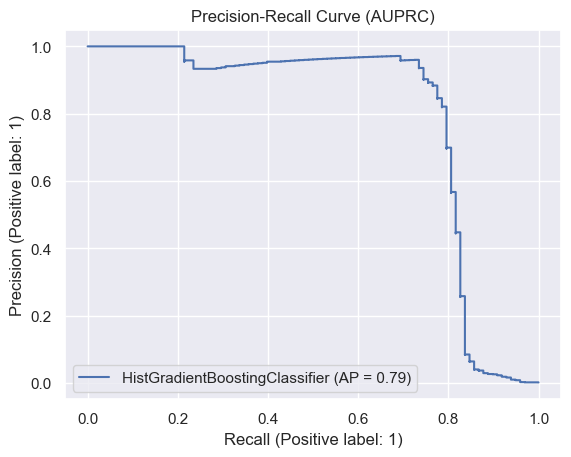

In [53]:
smote_score = plot_and_get_score(x_train, y_train, SMOTE(random_state=0), x_test, y_test)

In [54]:
print(f"SMOTE Over-Sampling auc_precision_recall Score is: {smote_score}")

SMOTE Over-Sampling auc_precision_recall Score is: 0.6697591738730767


### ADASYN

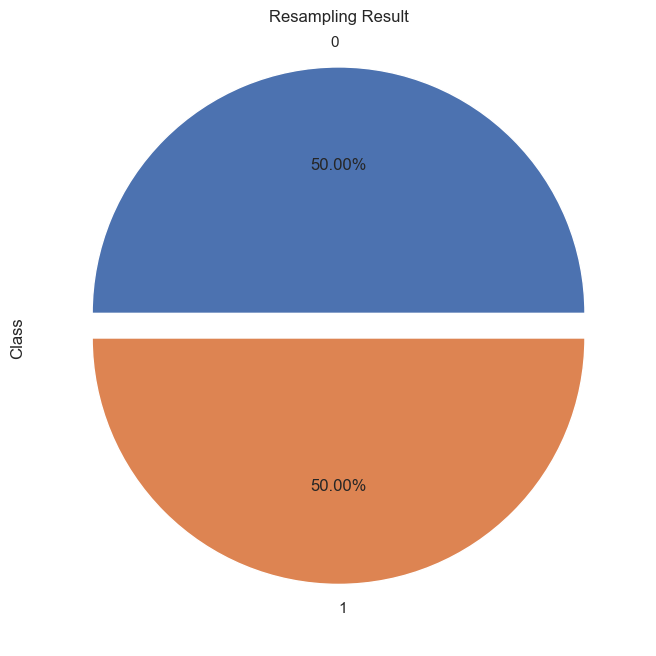

<Figure size 1500x800 with 0 Axes>

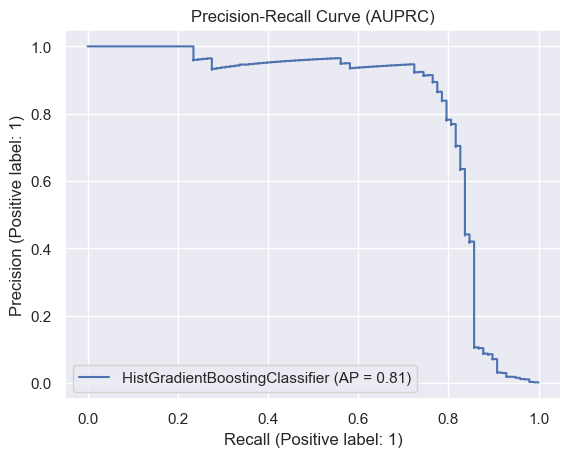

In [55]:
adasyn_score = plot_and_get_score(x_train, y_train, ADASYN(random_state=0), x_test, y_test)

In [56]:
print(f"ADASYN Over-Sampling auc_precision_recall Score is: {adasyn_score}")

ADASYN Over-Sampling auc_precision_recall Score is: 0.6231387619593792


### BorderlineSMOTE

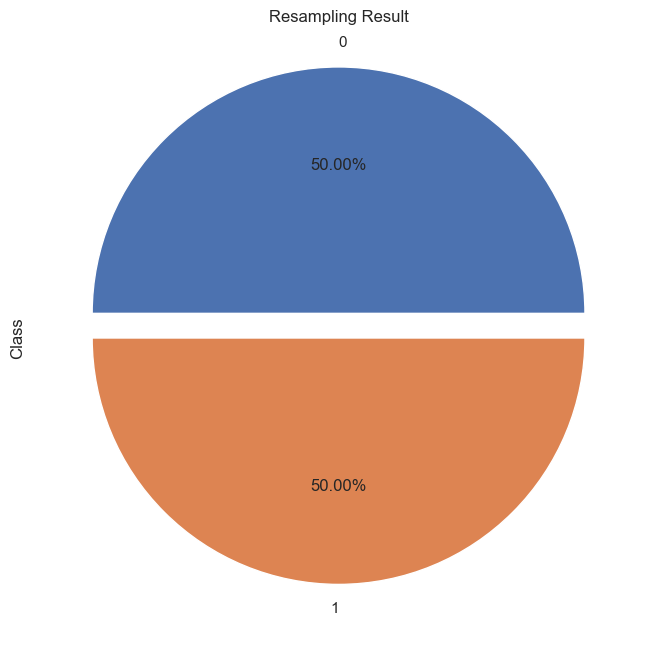

<Figure size 1500x800 with 0 Axes>

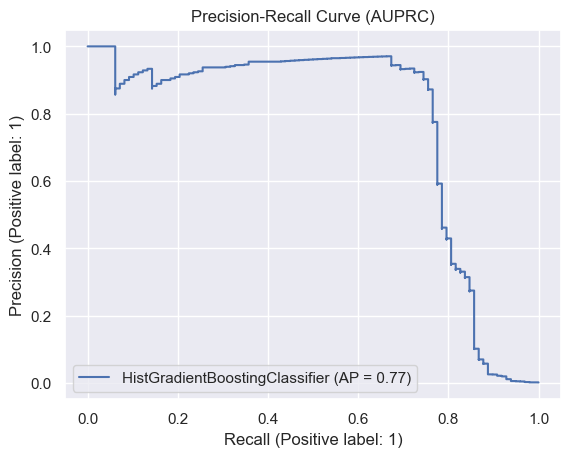

In [57]:
border_line_smote_score = plot_and_get_score(x_train, y_train, BorderlineSMOTE(random_state=0), x_test, y_test)

In [58]:
print(f"BorderlineSMOTE Over-Sampling auc_precision_recall Score is: {border_line_smote_score}")

BorderlineSMOTE Over-Sampling auc_precision_recall Score is: 0.7604972328455978


### SVMSMOTE

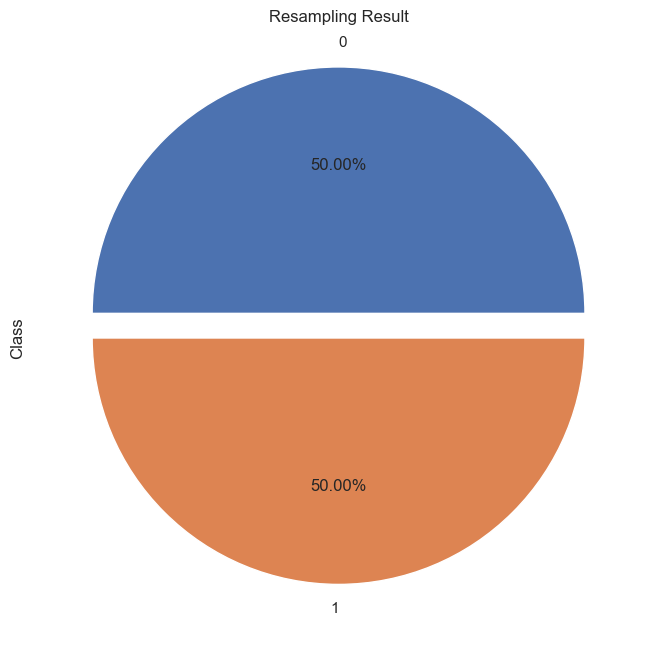

<Figure size 1500x800 with 0 Axes>

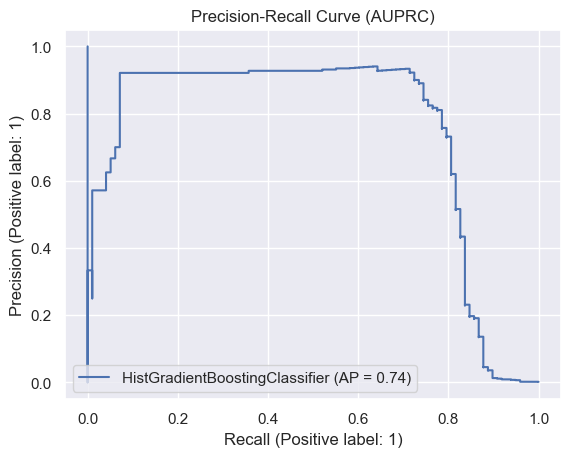

In [59]:
svmsmote_score = plot_and_get_score(x_train, y_train, SVMSMOTE(random_state=0), x_test, y_test)

In [60]:
print(f"SVMSMOTE Over-Sampling auc_precision_recall Score is: {svmsmote_score}")

SVMSMOTE Over-Sampling auc_precision_recall Score is: 0.7408348399485348


## Under-Sampling

### RandomUnderSampler

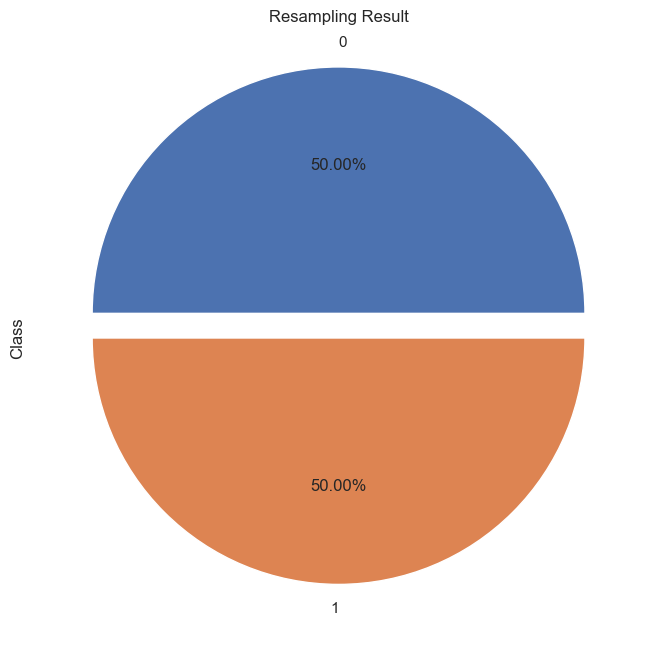

<Figure size 1500x800 with 0 Axes>

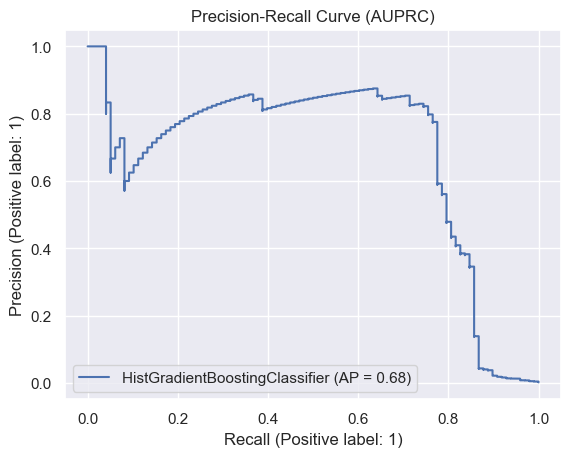

In [61]:
random_under_sampler_score = plot_and_get_score(x_train, y_train, RandomUnderSampler(random_state=0), x_test, y_test)

In [62]:
print(f"RandomUnderSampler Under-Sampling auc_precision_recall Score is: {random_under_sampler_score}")

RandomUnderSampler Under-Sampling auc_precision_recall Score is: 0.45826914736985874


### EditedNearestNeighbours

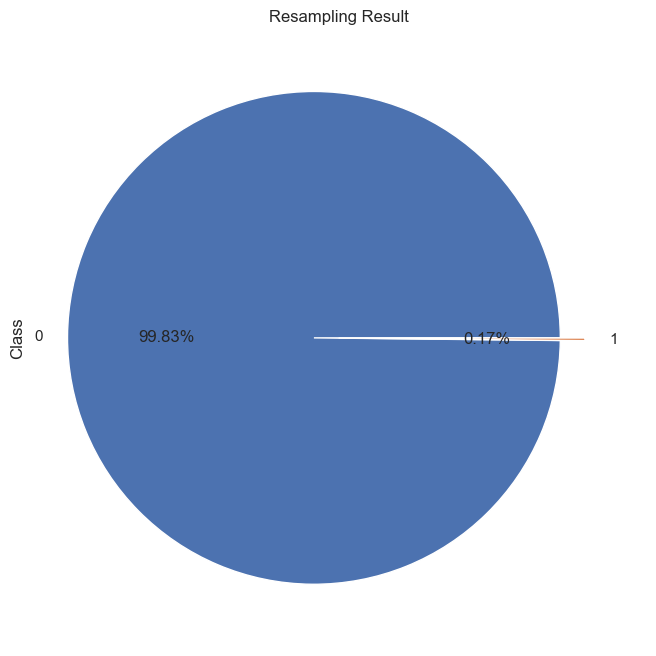

<Figure size 1500x800 with 0 Axes>

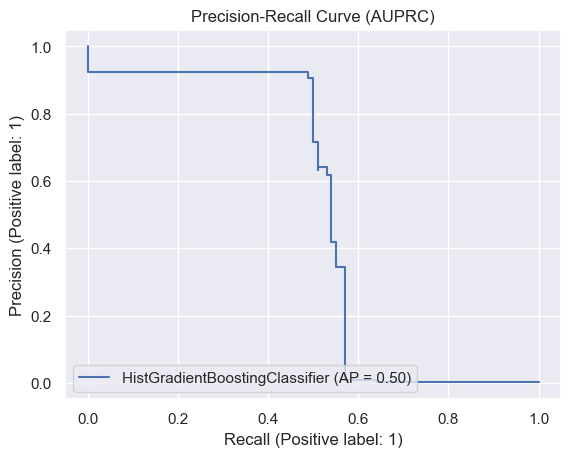

In [63]:
edited_nn_score = plot_and_get_score(x_train, y_train, EditedNearestNeighbours(n_jobs=-1), x_test, y_test)

In [64]:
print(f"EditedNearestNeighbours Under-Sampling auc_precision_recall Score is: {edited_nn_score}")

EditedNearestNeighbours Under-Sampling auc_precision_recall Score is: 0.571979070539451


### AllKNN

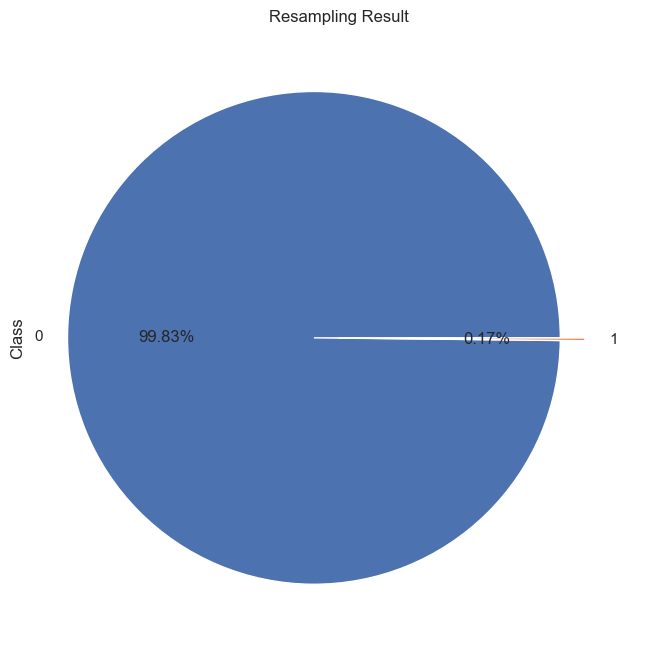

<Figure size 1500x800 with 0 Axes>

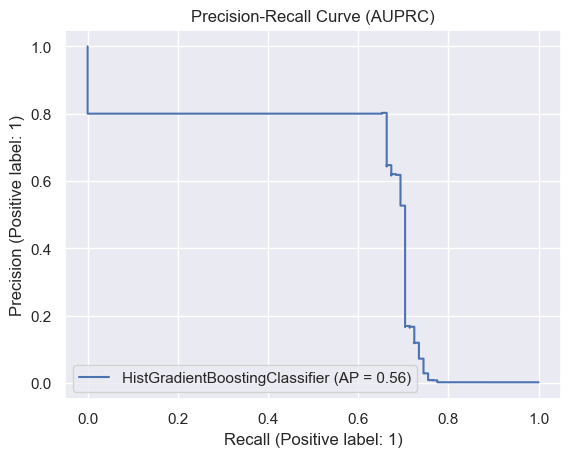

In [65]:
all_knn_score = plot_and_get_score(x_train, y_train, AllKNN(n_jobs=-1), x_test, y_test)

In [66]:
print(f"AllKNN Under-Sampling auc_precision_recall Score is: {all_knn_score}")

AllKNN Under-Sampling auc_precision_recall Score is: 0.6258906335507384


### NeighbourhoodCleaningRule

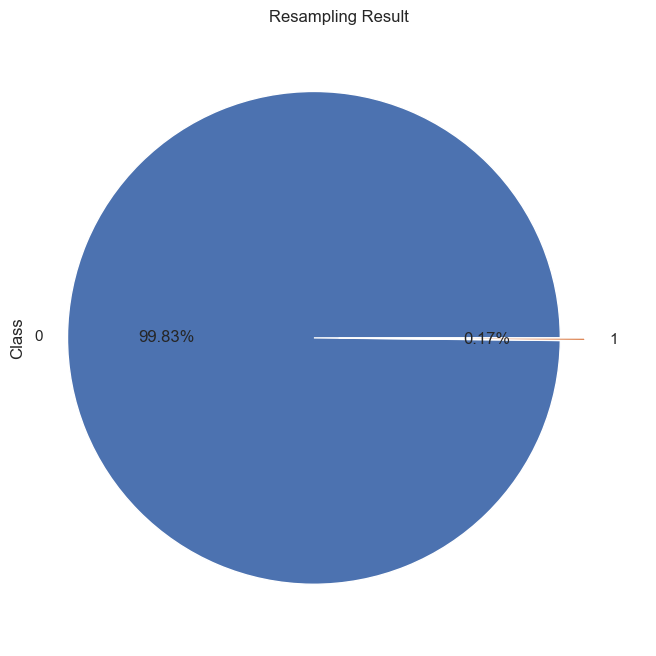

<Figure size 1500x800 with 0 Axes>

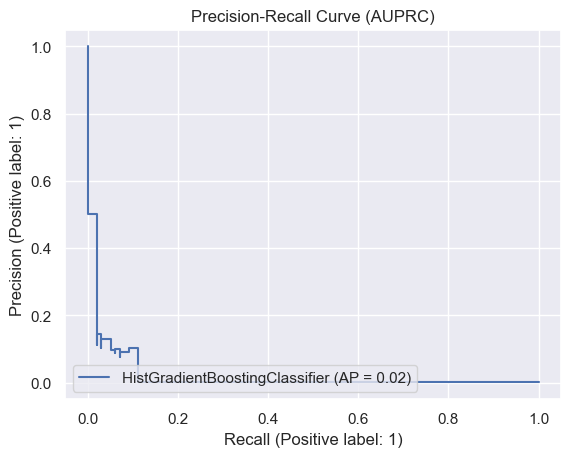

In [67]:
neighbourhood_Cleaning_Rule_score = plot_and_get_score(x_train, y_train, NeighbourhoodCleaningRule(n_jobs=-1), x_test, y_test)

In [68]:
print(f"NeighbourhoodCleaningRule Under-Sampling auc_precision_recall Score is: {neighbourhood_Cleaning_Rule_score}")

NeighbourhoodCleaningRule Under-Sampling auc_precision_recall Score is: 0.0697114402799145


# Choose The Bset Technique

In [69]:
x_axis = [
    "RandomOverSampler",
    "ADASYN",
    "SMOTE",
    "BorderlineSMOTE",
    "SVMSMOTE", 
    "RandomUnderSampler",
    "EditedNearestNeighbours",
    "AllKNN",
    "NeighbourhoodCleaningRule"
]

y_axis = [
    random_over_sampler_score,
    adasyn_score,
    smote_score,
    border_line_smote_score,
    svmsmote_score,
    random_under_sampler_score,
    edited_nn_score,
    all_knn_score,
    neighbourhood_Cleaning_Rule_score
]

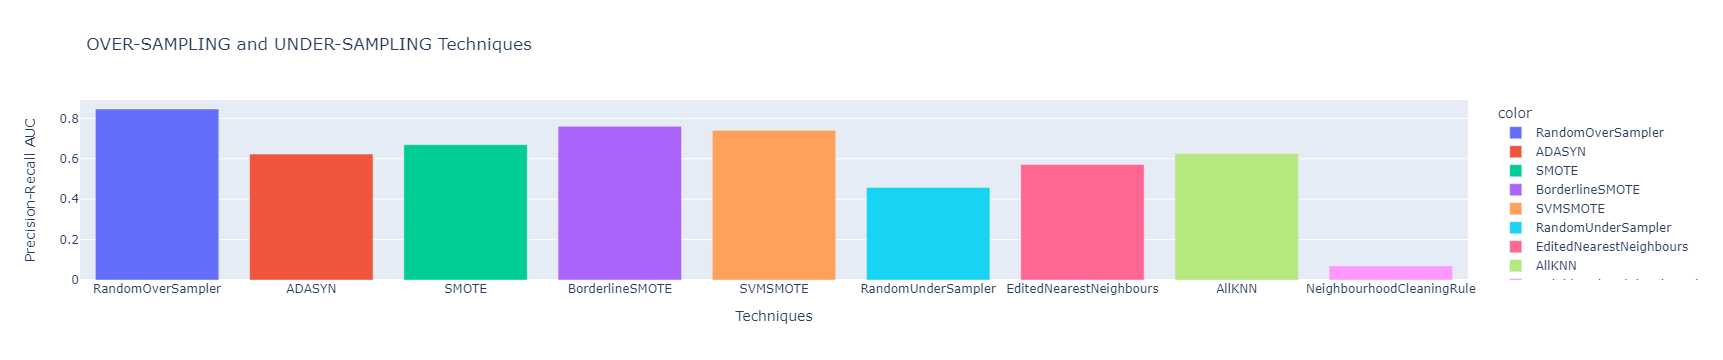

In [70]:
fig = px.bar(
    x=x_axis,
    y=y_axis,
    color=x_axis,
    title="OVER-SAMPLING and UNDER-SAMPLING Techniques",
    
)

# Update x-axis and y-axis labels
fig.update_xaxes(title_text="Techniques")
fig.update_yaxes(title_text="Precision-Recall AUC")

# Show the plot
fig.show()

# Handle Imbalance Data Using Random Over Sampling and Build The final Model

In [71]:
random_over_sampler = RandomOverSampler(random_state=0)
new_x_train, new_y_train = random_over_sampler.fit_resample(x_train, y_train)

In [72]:
hist_model = HistGradientBoostingClassifier(random_state=0)
hist_model.fit(new_x_train, new_y_train)

HistGradientBoostingClassifier(random_state=0)

In [73]:
y_pred = hist_model.predict(x_test)

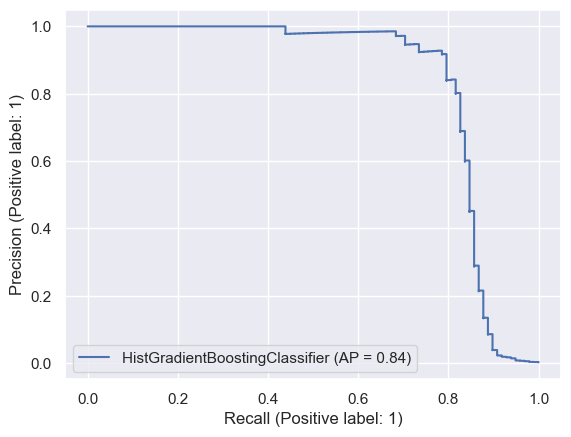

In [74]:
metrics.PrecisionRecallDisplay.from_estimator(hist_model, x_test, y_test)

In [75]:
# Data to plot precision - recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
auc_precision_recall = metrics.auc(recall, precision)

In [76]:
print(f"HistGradientBoostingClassifier Precision-Recall AUC is {auc_precision_recall}")

HistGradientBoostingClassifier Precision-Recall AUC is 0.8464106013760152


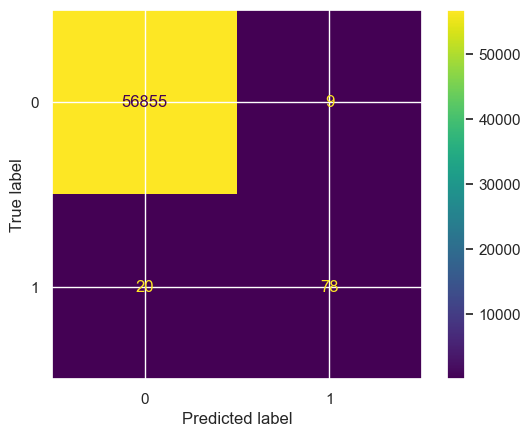

In [78]:
metrics.ConfusionMatrixDisplay.from_estimator(
    hist_model,
    x_test, 
    y_test
)

In [79]:
print(f"HistGradientBoostingClassifier Precision-Recall AUC is {metrics.roc_auc_score(y_test, y_pred)}")

HistGradientBoostingClassifier Precision-Recall AUC is 0.8978800474888886


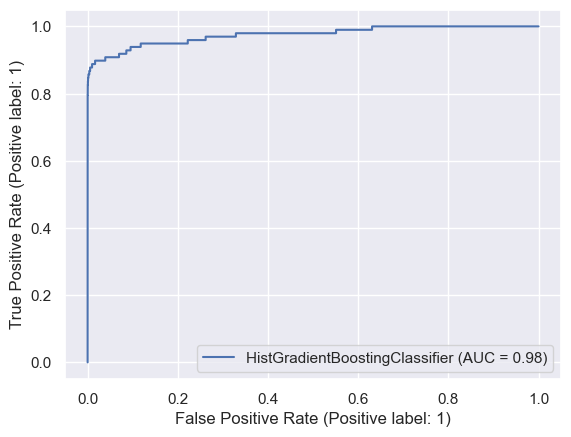

In [80]:
metrics.RocCurveDisplay.from_estimator(
    hist_model,
    x_test, 
    y_test
)